Multiple Linear Regression

BOOM BIKE CASE STUDY

In this notebook,Lets build a multilinear regression model to predict 'demand for shared bikes.` and accelerate its revenue using an appropriate predictor variablewhich can be adapted post lockdown

Problem Statement:
boom bikes provide shared bikes from hop on and hop off.during covid they saw revunue dip,company wants to sustain and rebuild the revenue

Essentially, BoomBikes company wants to know factors affecting the demand of bikes

1.Which variables are significant in predicting the demand for shared bikes. 2.How well those variables describe the bike demands

based on survey they got bike sharing dataset cnt is target variable

The euation found on building linear model  cnt=0.253+(0.253×yr)-(0.098×holiday)+(0.450×temp)−(0.140×windspeed)-(0.073×Jul)+(0.057×sep)-(0.112×spring)+(0.045×winter)−(0.080×Mist + Cloudy)-(0.285*lightrain/snow)

Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike sharing 'day' dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

In [2]:
#read the data
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()
# No null values seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Identifying continous and categorical columns.Since day.csv has only 730 records in it and it is small .i have set a threshold value to 20
# no:of unique values <=20: Categorical column
# no:ofunique values in a columns> 20: Continuous

bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [7]:
#Lets consider this as categorical variable
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [8]:
#Lets consider this as categorical variable
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [9]:
bike.describe()
#summary of the stastical data

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [10]:

#Mapping all categoical variables from data dictionary

bike.season=bike.season.map({1:"spring",2:"summer", 3:'fall', 4:'winter'})
bike.weathersit=bike.weathersit.map({1:"Clear/partiallycloud",2:"Mist + Cloudy",3:"light rain/snow",4:"Heavy Rain" })
bike.weekday=bike.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike.mnth=bike.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [11]:
bike.describe()

instant          yr     holiday  workingday        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.500000    0.028767    0.690411   20.319259   23.726322   
std    210.877136    0.500343    0.167266    0.462641    7.506729    8.150308   
min      1.000000    0.000000    0.000000    0.000000    2.424346    3.953480   
25%    183.250000    0.000000    0.000000    0.000000   13.811885   16.889713   
50%    365.500000    0.500000    0.000000    1.000000   20.465826   24.368225   
75%    547.750000    1.000000    0.000000    1.000000   26.880615   30.445775   
max    730.000000    1.000000    1.000000    1.000000   35.328347   42.044800   

              hum   windspeed       casual   registered          cnt  
count  730.000000  730.000000   730.000000   730.000000   730.000000  
mean    62.765175   12.763620   849.249315  3658.757534  4508.006849  
std     14.237589    5.195841   686.479875  1559.758728  1936.011647  
min      0.000000    1.500244     2.000000    20.000000    22.000000  
25%     52.000000    9.041650   316.250000  2502.250000  3169.750000  
50%     62.625000   12.125325   717.000000  3664.500000  4548.500000  
75%     72.989575   15.625589  1096.500000  4783.250000  5966.000000  
max     97.250000   34.000021  3410.000000  6946.000000  8714.000000

Step 2: Visualising/ Data understanding .

If there is some obvious multicollinearity going on, this is the first place to catch it Here's where you'll also identify if some predictors directly have a strong association with the outcome variable We'll visualise our data using matplotlib and seaborn.

In [12]:
num_var=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant']

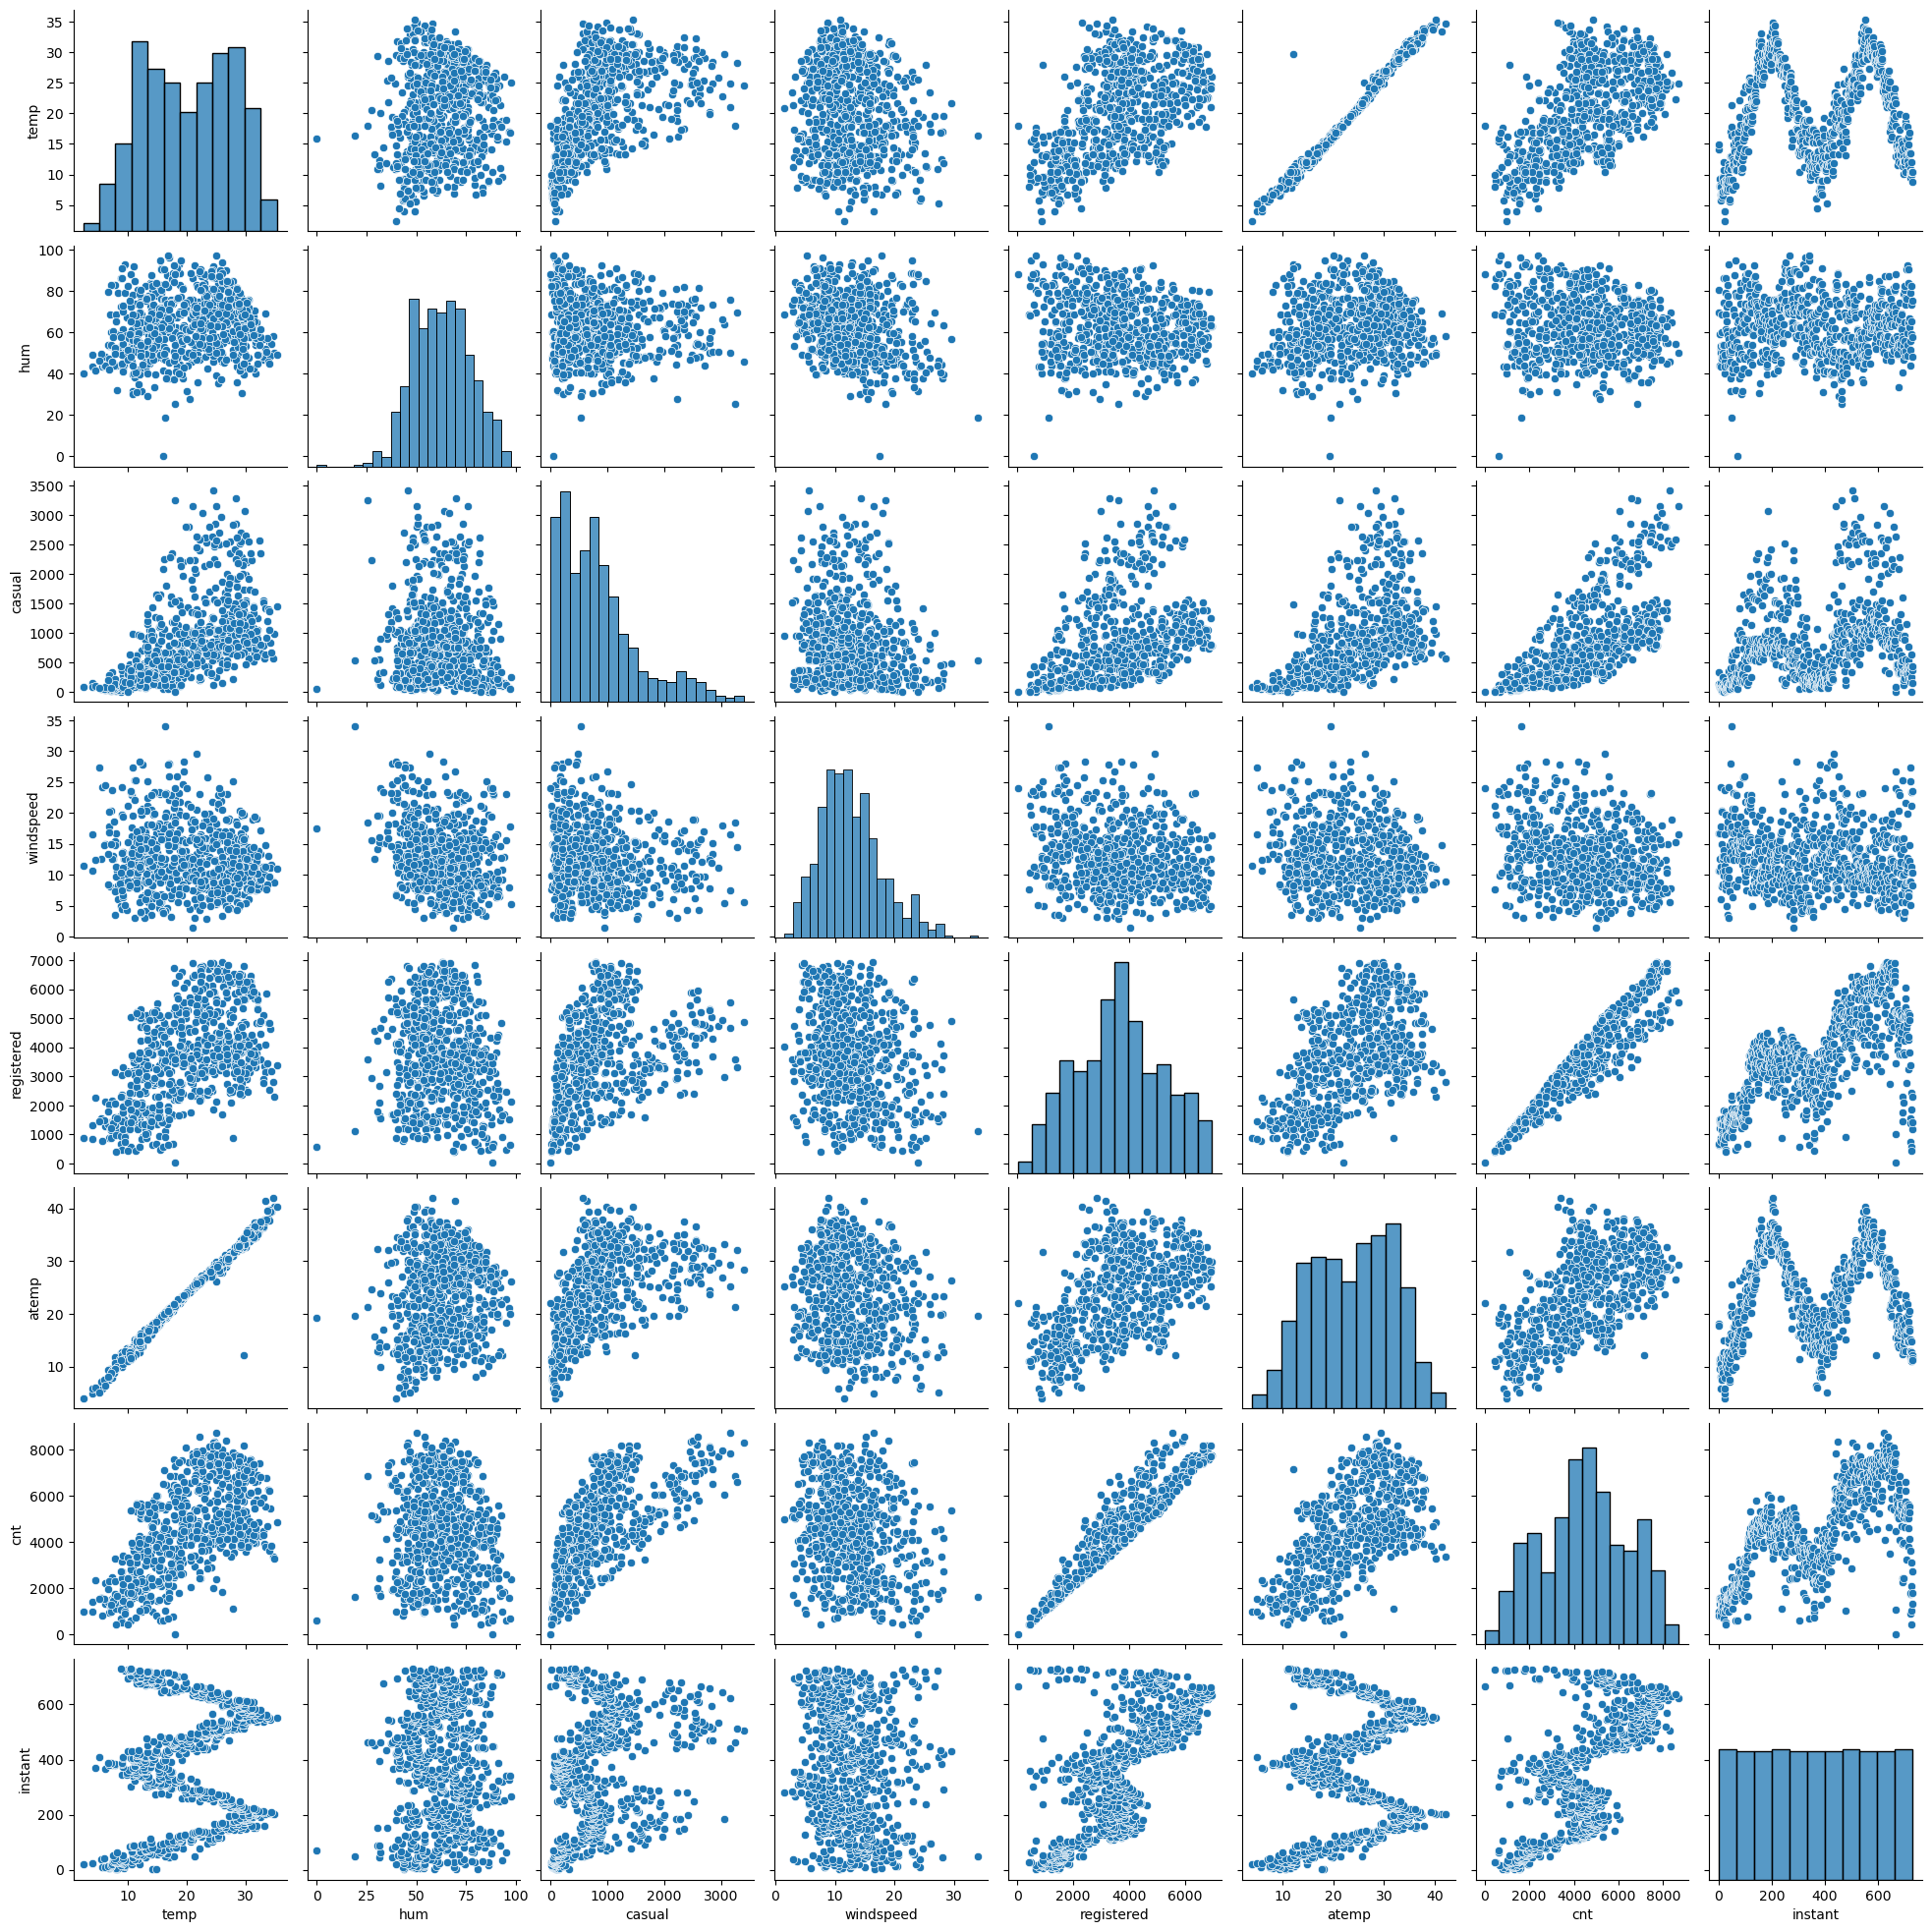

In [13]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(bike[num_var])
plt.show()

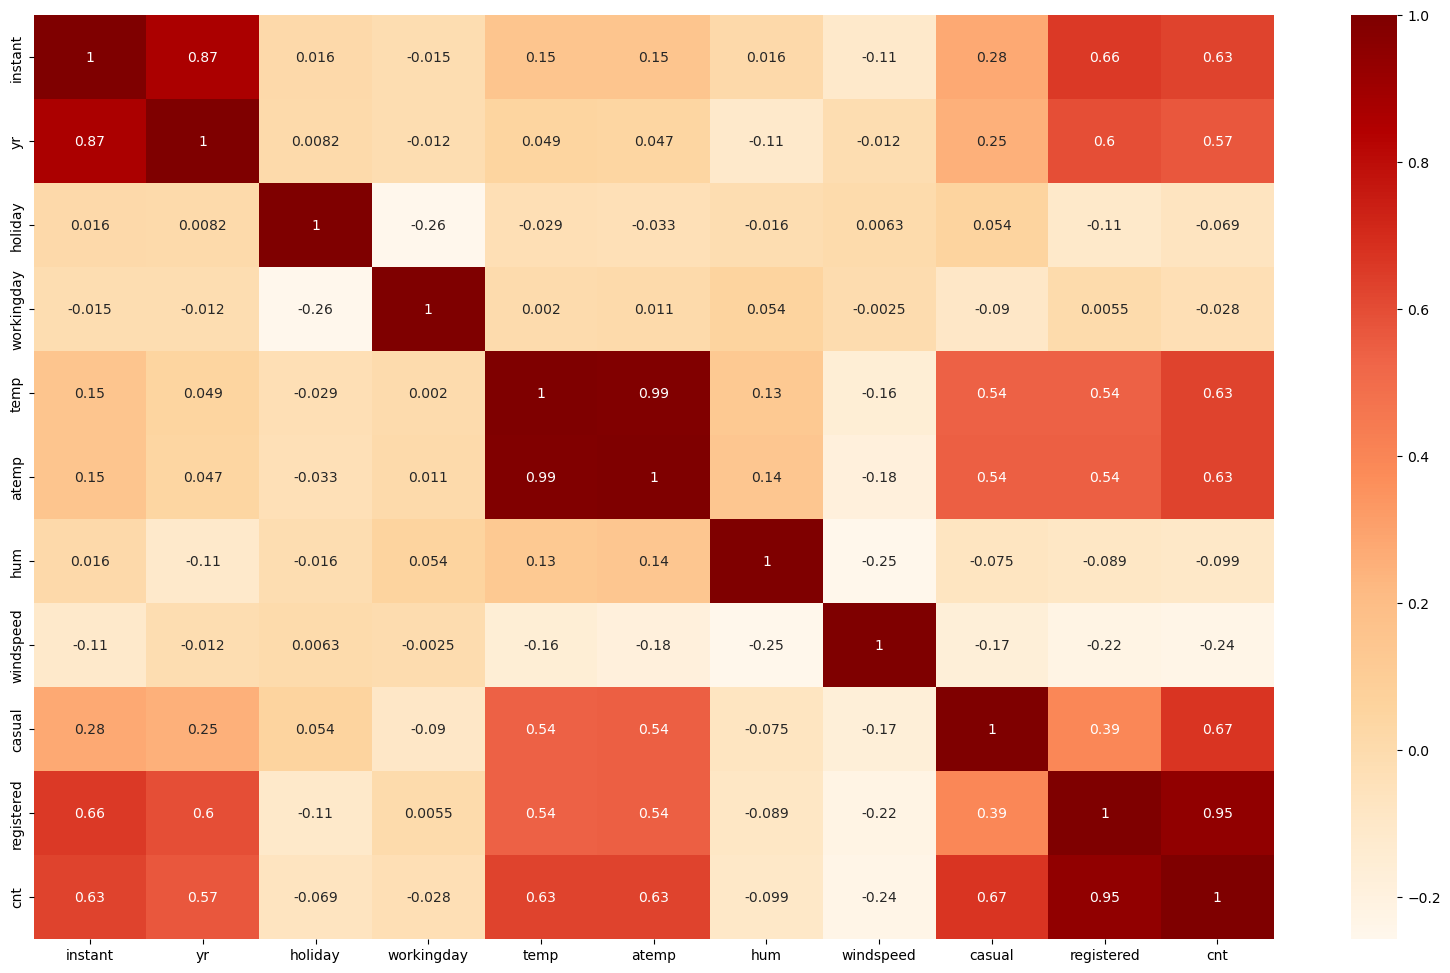

In [14]:
#checking corelation
plt.figure(figsize = (20, 12))
sns.heatmap(bike.corr(), annot = True, cmap="OrRd")
plt.show()

#Based on heat map Lets drop atemp since temp and atemp have strong correlation of 0.99
#Lets drop casual and registered since these added together is cnt column and it is not necessary for analysis
#Lets drop instant and dteday as it doesnt contribute much further analysis

In [15]:
bike=bike.drop(['instant','dteday','casual','registered','atemp'], axis=1)


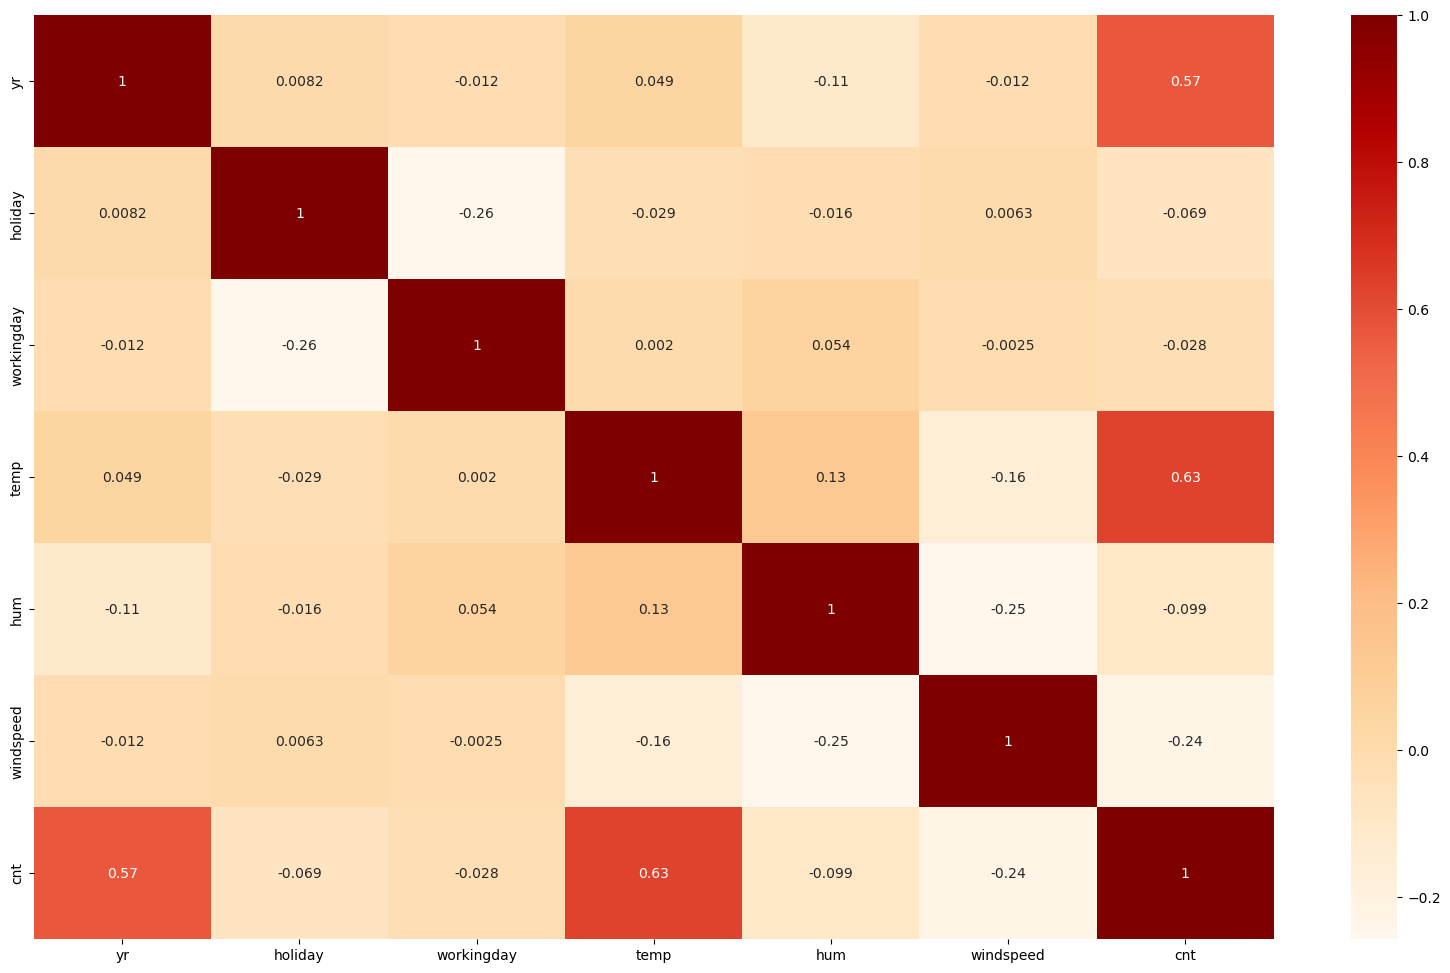

In [16]:
#Bike corr
plt.figure(figsize = (20, 12))
sns.heatmap(bike.corr(), annot = True, cmap="OrRd")
plt.show()

#From the above heat map we can conclude that their is linear relationship between cnt,yr,temp .So we can go ahead and build the regression model

#stasticalanalysis -data skewness in holiday,working day, so scaling might be required which will delt in later stage

#yr,temp,hum etc is normally distributed since mean and median are almost same
#working day data is left skewed
#holiday data is right skewed

In [17]:
bike.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.462641    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

#Univariate analysis

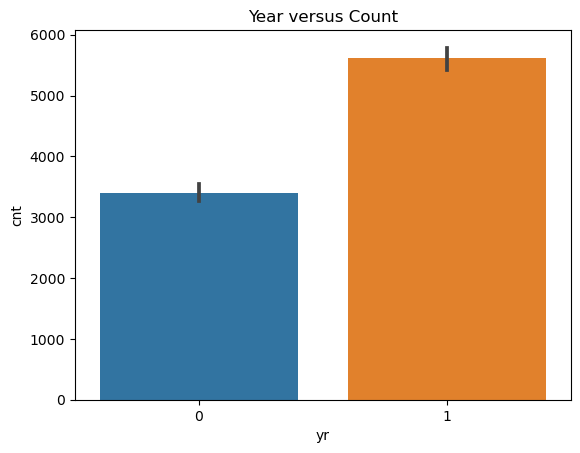

In [18]:
#Relation between Year and count of bike rentals
sns.barplot('yr','cnt',data=bike)
plt.title("Year versus Count")
plt.show()


Analysis:bike demand has increased in 2019 compared to 2018

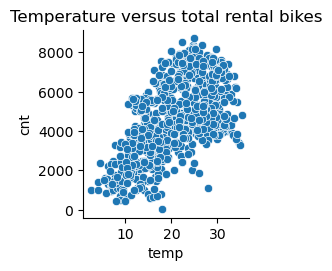

In [19]:
#Numerical Data visualization
#Relation between Temperature and count of bike rentals
sns.pairplot(x_vars='temp',y_vars='cnt',data=bike)
plt.title("Temperature versus total rental bikes")
plt.show()

Analysis: with raise in temperature bike Rentals also got increased 

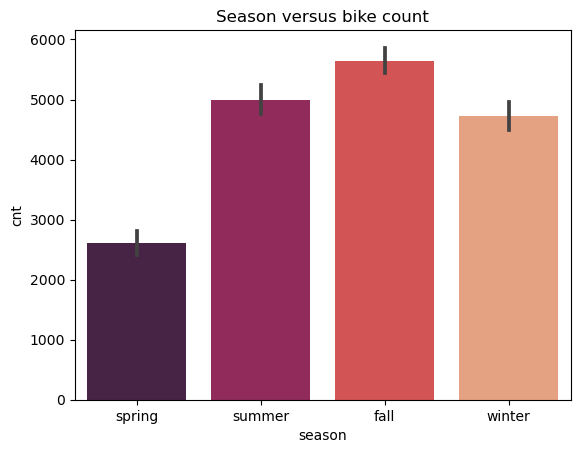

In [20]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','cnt',data=bike,palette="rocket",)
plt.title("Season versus bike count")
plt.show()

Analysis:Bike rentals seen higher in Fall followed by summer

visualizing categorical variable versus Numerical Variable

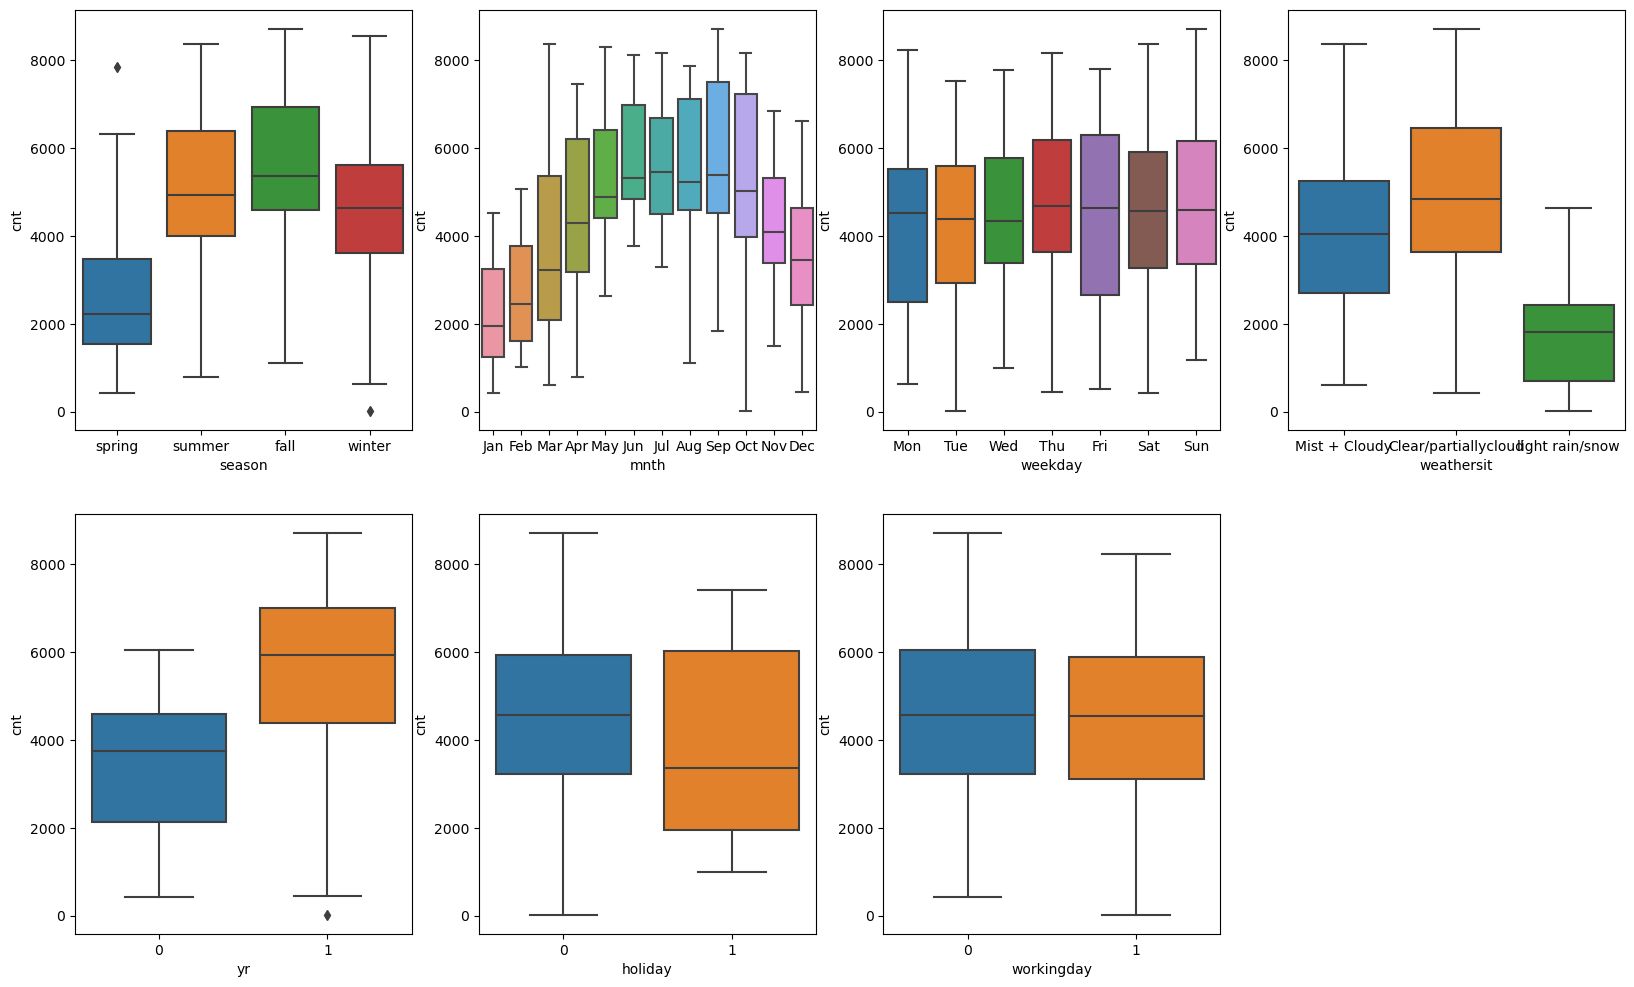

In [21]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(data=bike,x='season',y='cnt')
plt.subplot(2,4,2)
sns.boxplot(data=bike,x='mnth',y='cnt')
plt.subplot(2,4,3)
sns.boxplot(data=bike,x='weekday',y='cnt')
plt.subplot(2,4,4)
sns.boxplot(data=bike,x='weathersit',y='cnt')
plt.subplot(2,4,5)
sns.boxplot(data=bike,x='yr',y='cnt')
plt.subplot(2,4,6)
sns.boxplot(data=bike,x='holiday',y='cnt')
plt.subplot(2,4,7)
sns.boxplot(data=bike,x='workingday',y='cnt')
plt.show()

Analysis:

1.heavy rain their is no data found in boxplot since their is no data caputed  in this data set 

2.Bike Demand can be seen during summer and end of fall i.e., jun to oct month

3.first priority is fall,sep,clear/partially cloud have high demand for boombox bikes compared to other

4.Total Bike were hired during Holidays

5.Sundays,Saturday and Monday where more bikes are rented

6.Bike demand has increased in 2019 compared to 2018


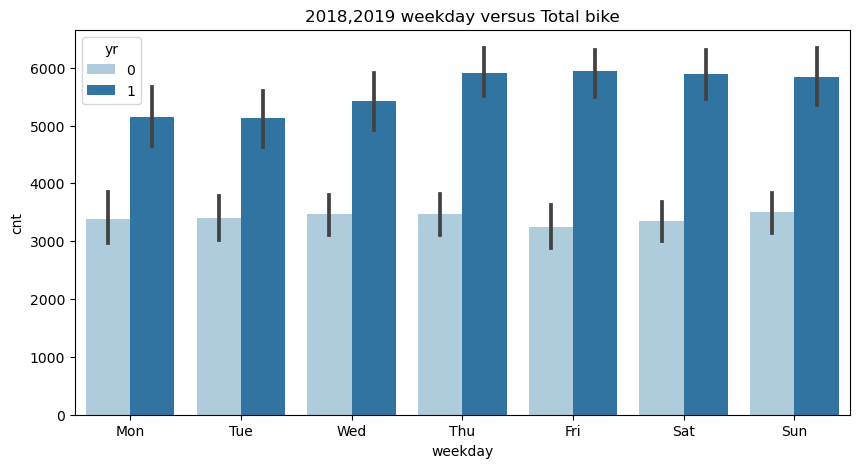

In [22]:
#Analysis -weekday and count 
plt.figure(figsize=(10,5))
sns.barplot('weekday','cnt',hue='yr',data=bike,palette='Paired')
plt.title("2018,2019 weekday versus Total bike")
plt.show()

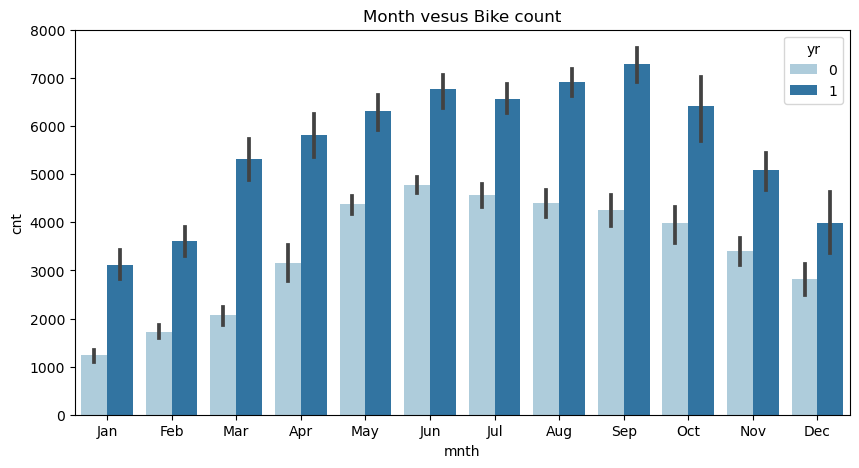

In [23]:
#Analysis - month and count
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=bike,palette='Paired')
plt.title("Month vesus Bike count")
plt.show()

Analysis:

    Bike rentals were more on 2019
    Total count was more during Sep 2019

#Bivariate analysis Category to category

In [24]:
bike_2018=bike.loc[bike["yr"]==0]
bike_2019=bike.loc[bike["yr"]==1]



In [25]:
bike_2018.groupby(["season"])['weathersit']
bike_2019.groupby(["season"])['weathersit']

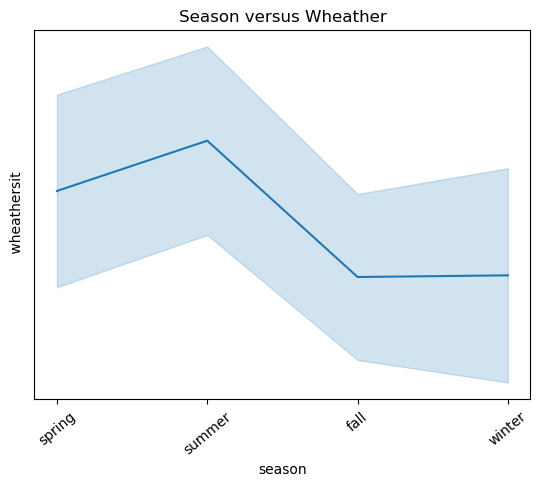

In [26]:
sns.lineplot(data=bike_2018, x='season', y='weathersit')
plt.ylabel(" wheathersit")
plt.xlabel("season")
plt.title("Season versus Wheather")
plt.xticks(rotation=40)
plt.show()

Analysis

1.in 2019 during fall their was a peek in demand and sudden dip in until winter,in 2018 lower demand and sustained the same throught winter

2.From spring to summer their is a steady rise seen in both the years

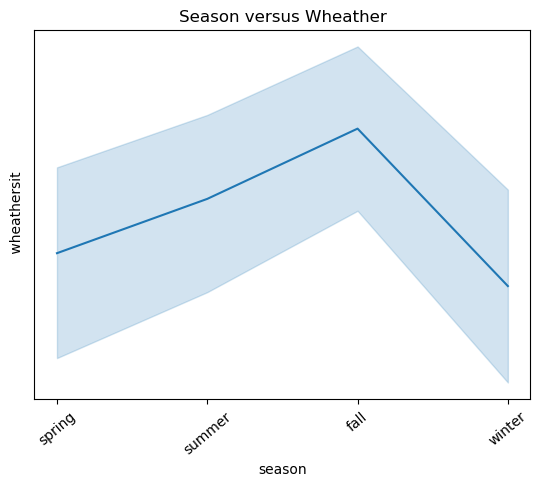

In [27]:
sns.lineplot(data=bike_2019, x='season', y='weathersit')
plt.ylabel(" wheathersit")
plt.xlabel("season")
plt.title("Season versus Wheather")
plt.xticks(rotation=40)
plt.show()


###Multivariate

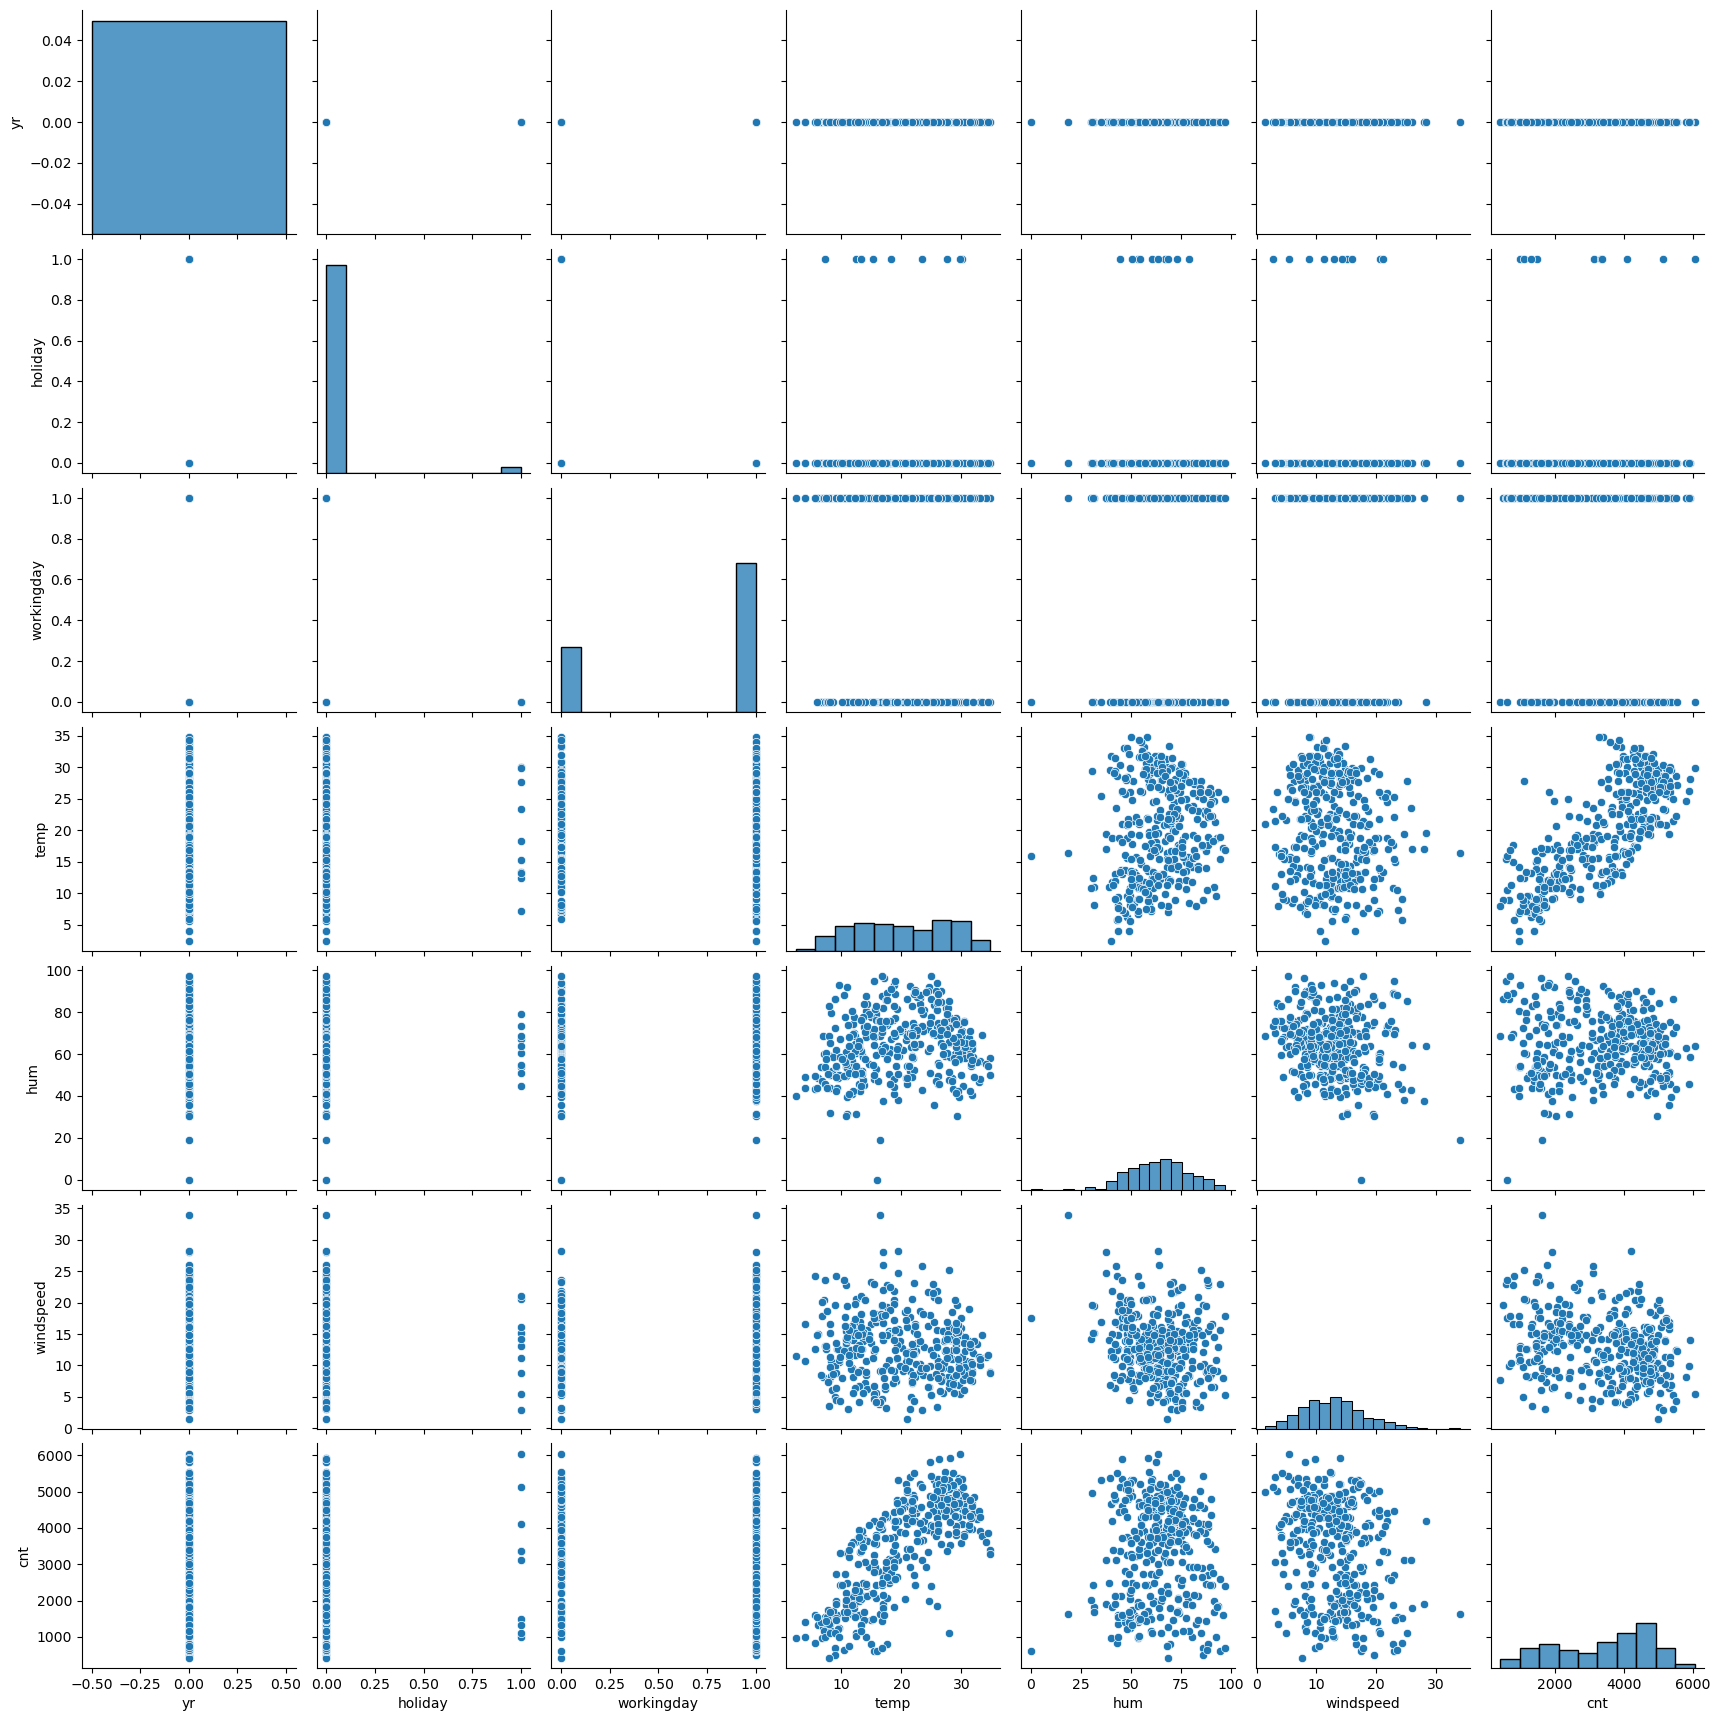

In [28]:
sns.pairplot(data=bike_2018)
plt.show()

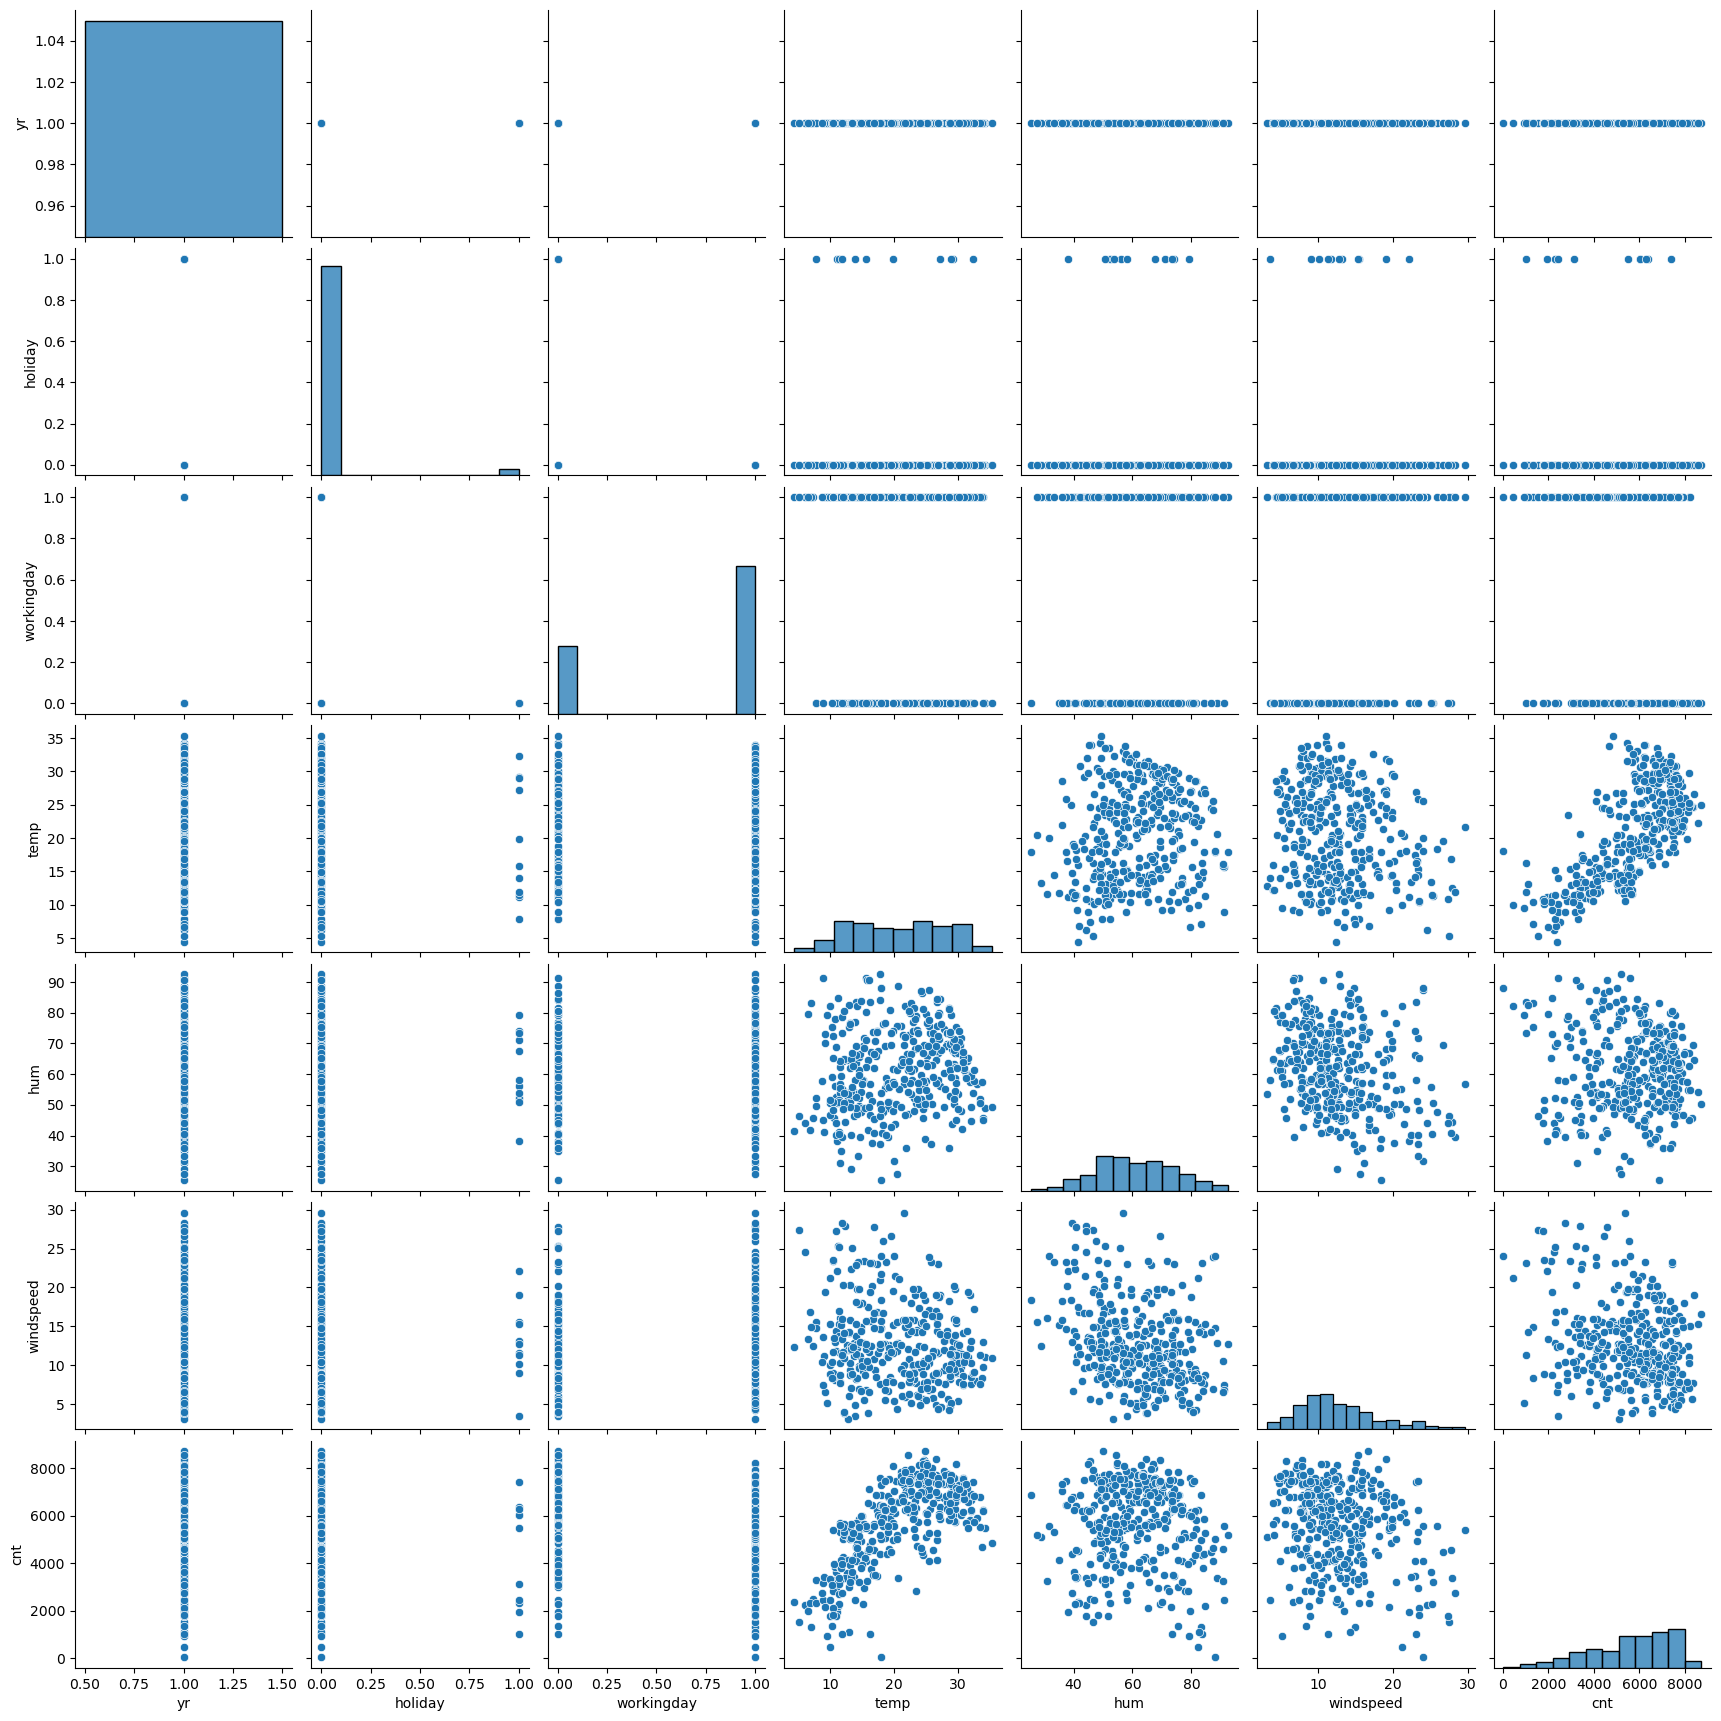

In [29]:
sns.pairplot(data=bike_2019)
plt.show()

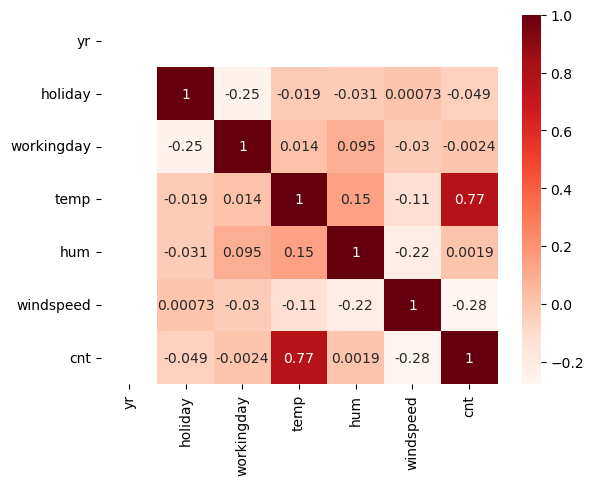

In [30]:
sns.heatmap(bike_2018.corr(),annot=True,cmap='Reds')
plt.show()

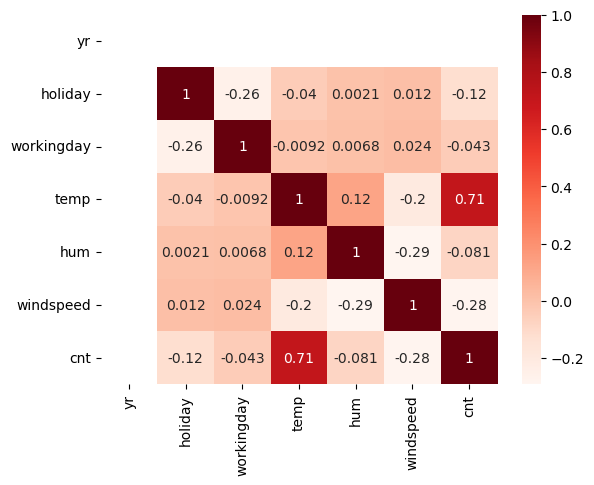

In [31]:
sns.heatmap(bike_2019.corr(),annot=True,cmap='Reds')
plt.show()
#corelation > 0.71 between count and temp in both 2018 and 2019

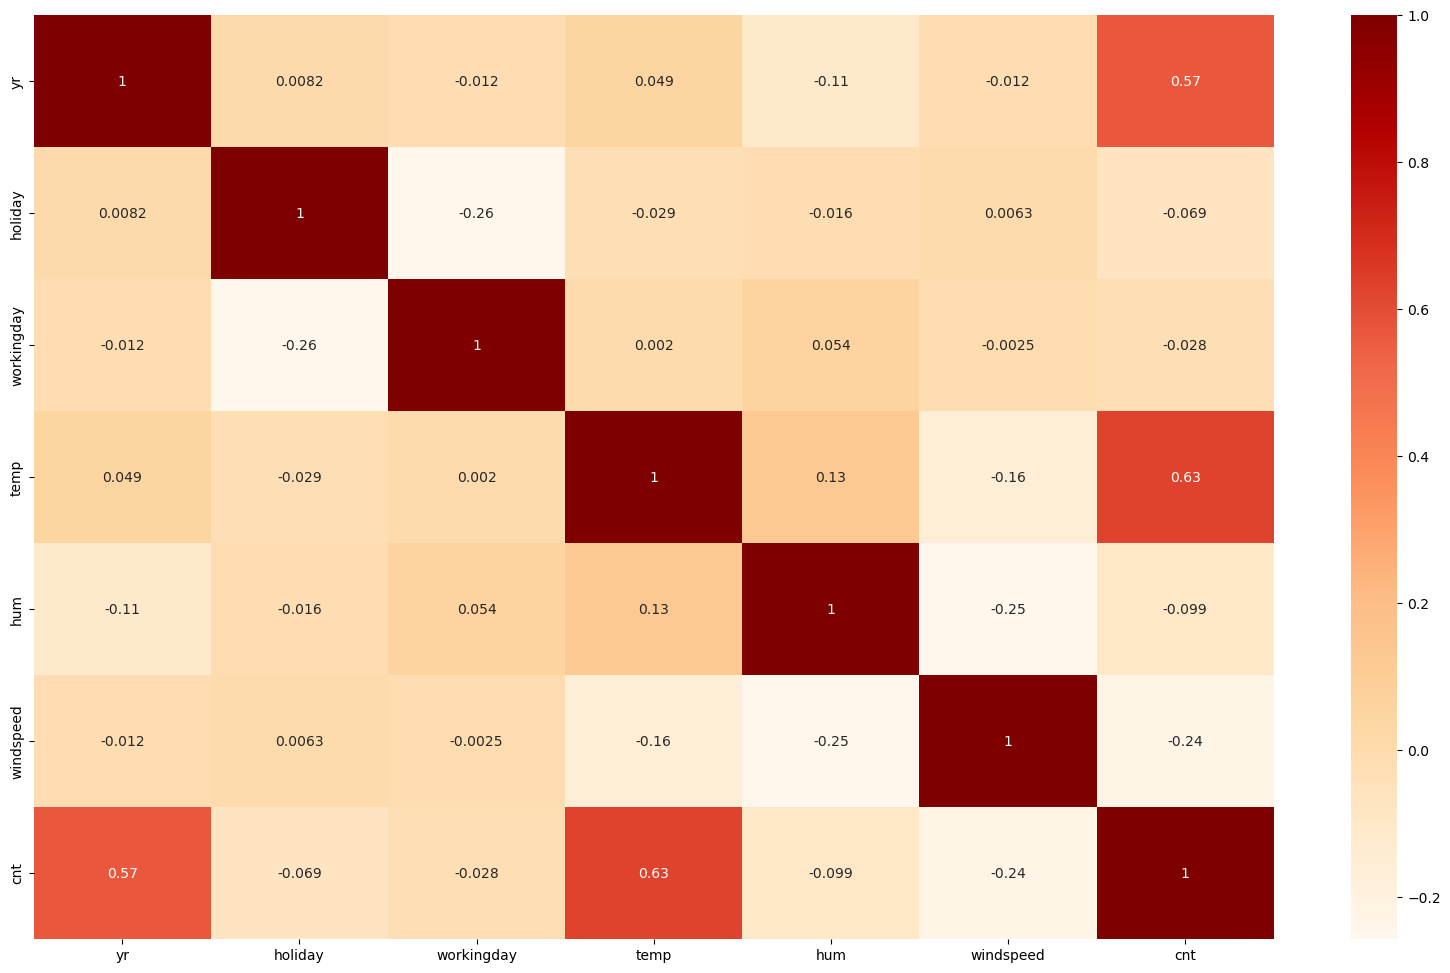

In [32]:
#Bike corr
plt.figure(figsize = (20, 12))
sns.heatmap(bike.corr(), annot = True, cmap="OrRd")
plt.show()
#the whole bike data set, year and count has correalation =0.57




STEP 3 :Preparing Data for Modelling

Encoding: converting binary vars to 1/0(Their are no binary variables in this data set so skip this step) other categorical vars to dummy variable


In [33]:
bike.head()

season  yr mnth  holiday weekday  workingday            weathersit  \
0  spring   0  Jan        0     Mon           1         Mist + Cloudy   
1  spring   0  Jan        0     Tue           1         Mist + Cloudy   
2  spring   0  Jan        0     Wed           1  Clear/partiallycloud   
3  spring   0  Jan        0     Thu           1  Clear/partiallycloud   
4  spring   0  Jan        0     Fri           1  Clear/partiallycloud   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

In [34]:
bike.shape

(730, 11)

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [36]:
 # Get the dummy variables for the feature 'weathersit',mnth,season,weekday and store it in a 'weathersit',mnth,season,weekday  variable respectively

mnth = pd.get_dummies(bike.mnth, drop_first = True)
weekday = pd.get_dummies(bike.weekday, drop_first = True)
season = pd.get_dummies(bike.season, drop_first = True)
weathersit = pd.get_dummies(bike.weathersit, drop_first = True)

In [37]:
bike=pd.concat([bike,mnth,weekday,season,weathersit],axis=1)

In [38]:
bike.head()

season  yr mnth  holiday weekday  workingday            weathersit  \
0  spring   0  Jan        0     Mon           1         Mist + Cloudy   
1  spring   0  Jan        0     Tue           1         Mist + Cloudy   
2  spring   0  Jan        0     Wed           1  Clear/partiallycloud   
3  spring   0  Jan        0     Thu           1  Clear/partiallycloud   
4  spring   0  Jan        0     Fri           1  Clear/partiallycloud   

        temp      hum  windspeed  ...  Sat  Sun  Thu  Tue  Wed  spring  \
0  14.110847  80.5833  10.749882  ...    0    0    0    0    0       1   
1  14.902598  69.6087  16.652113  ...    0    0    0    1    0       1   
2   8.050924  43.7273  16.636703  ...    0    0    0    0    1       1   
3   8.200000  59.0435  10.739832  ...    0    0    1    0    0       1   
4   9.305237  43.6957  12.522300  ...    0    0    0    0    0       1   

   summer  winter  Mist + Cloudy  light rain/snow  
0       0       0              1                0  
1       0       0              1                0  
2       0       0              0                0  
3       0       0              0                0  
4       0       0              0                0  

[5 rows x 33 columns]

In [39]:
bike.drop(['mnth','weekday','season','weathersit'], axis = 1, inplace = True)

In [40]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  Aug  Dec  \
0   0        0           1  14.110847  80.5833  10.749882   985    0    0   
1   0        0           1  14.902598  69.6087  16.652113   801    0    0   
2   0        0           1   8.050924  43.7273  16.636703  1349    0    0   
3   0        0           1   8.200000  59.0435  10.739832  1562    0    0   
4   0        0           1   9.305237  43.6957  12.522300  1600    0    0   

   Feb  ...  Sat  Sun  Thu  Tue  Wed  spring  summer  winter  Mist + Cloudy  \
0    0  ...    0    0    0    0    0       1       0       0              1   
1    0  ...    0    0    0    1    0       1       0       0              1   
2    0  ...    0    0    0    0    1       1       0       0              0   
3    0  ...    0    0    1    0    0       1       0       0              0   
4    0  ...    0    0    0    0    0       1       0       0              0   

   light rain/snow  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 29 columns]

In [41]:
bike.shape

(730, 29)

In [42]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   Aug              730 non-null    uint8  
 8   Dec              730 non-null    uint8  
 9   Feb              730 non-null    uint8  
 10  Jan              730 non-null    uint8  
 11  Jul              730 non-null    uint8  
 12  Jun              730 non-null    uint8  
 13  Mar              730 non-null    uint8  
 14  May              730 non-null    uint8  
 15  Nov              730 non-null    uint8  
 16  Oct              730 non-null    uint8  
 17  Sep             

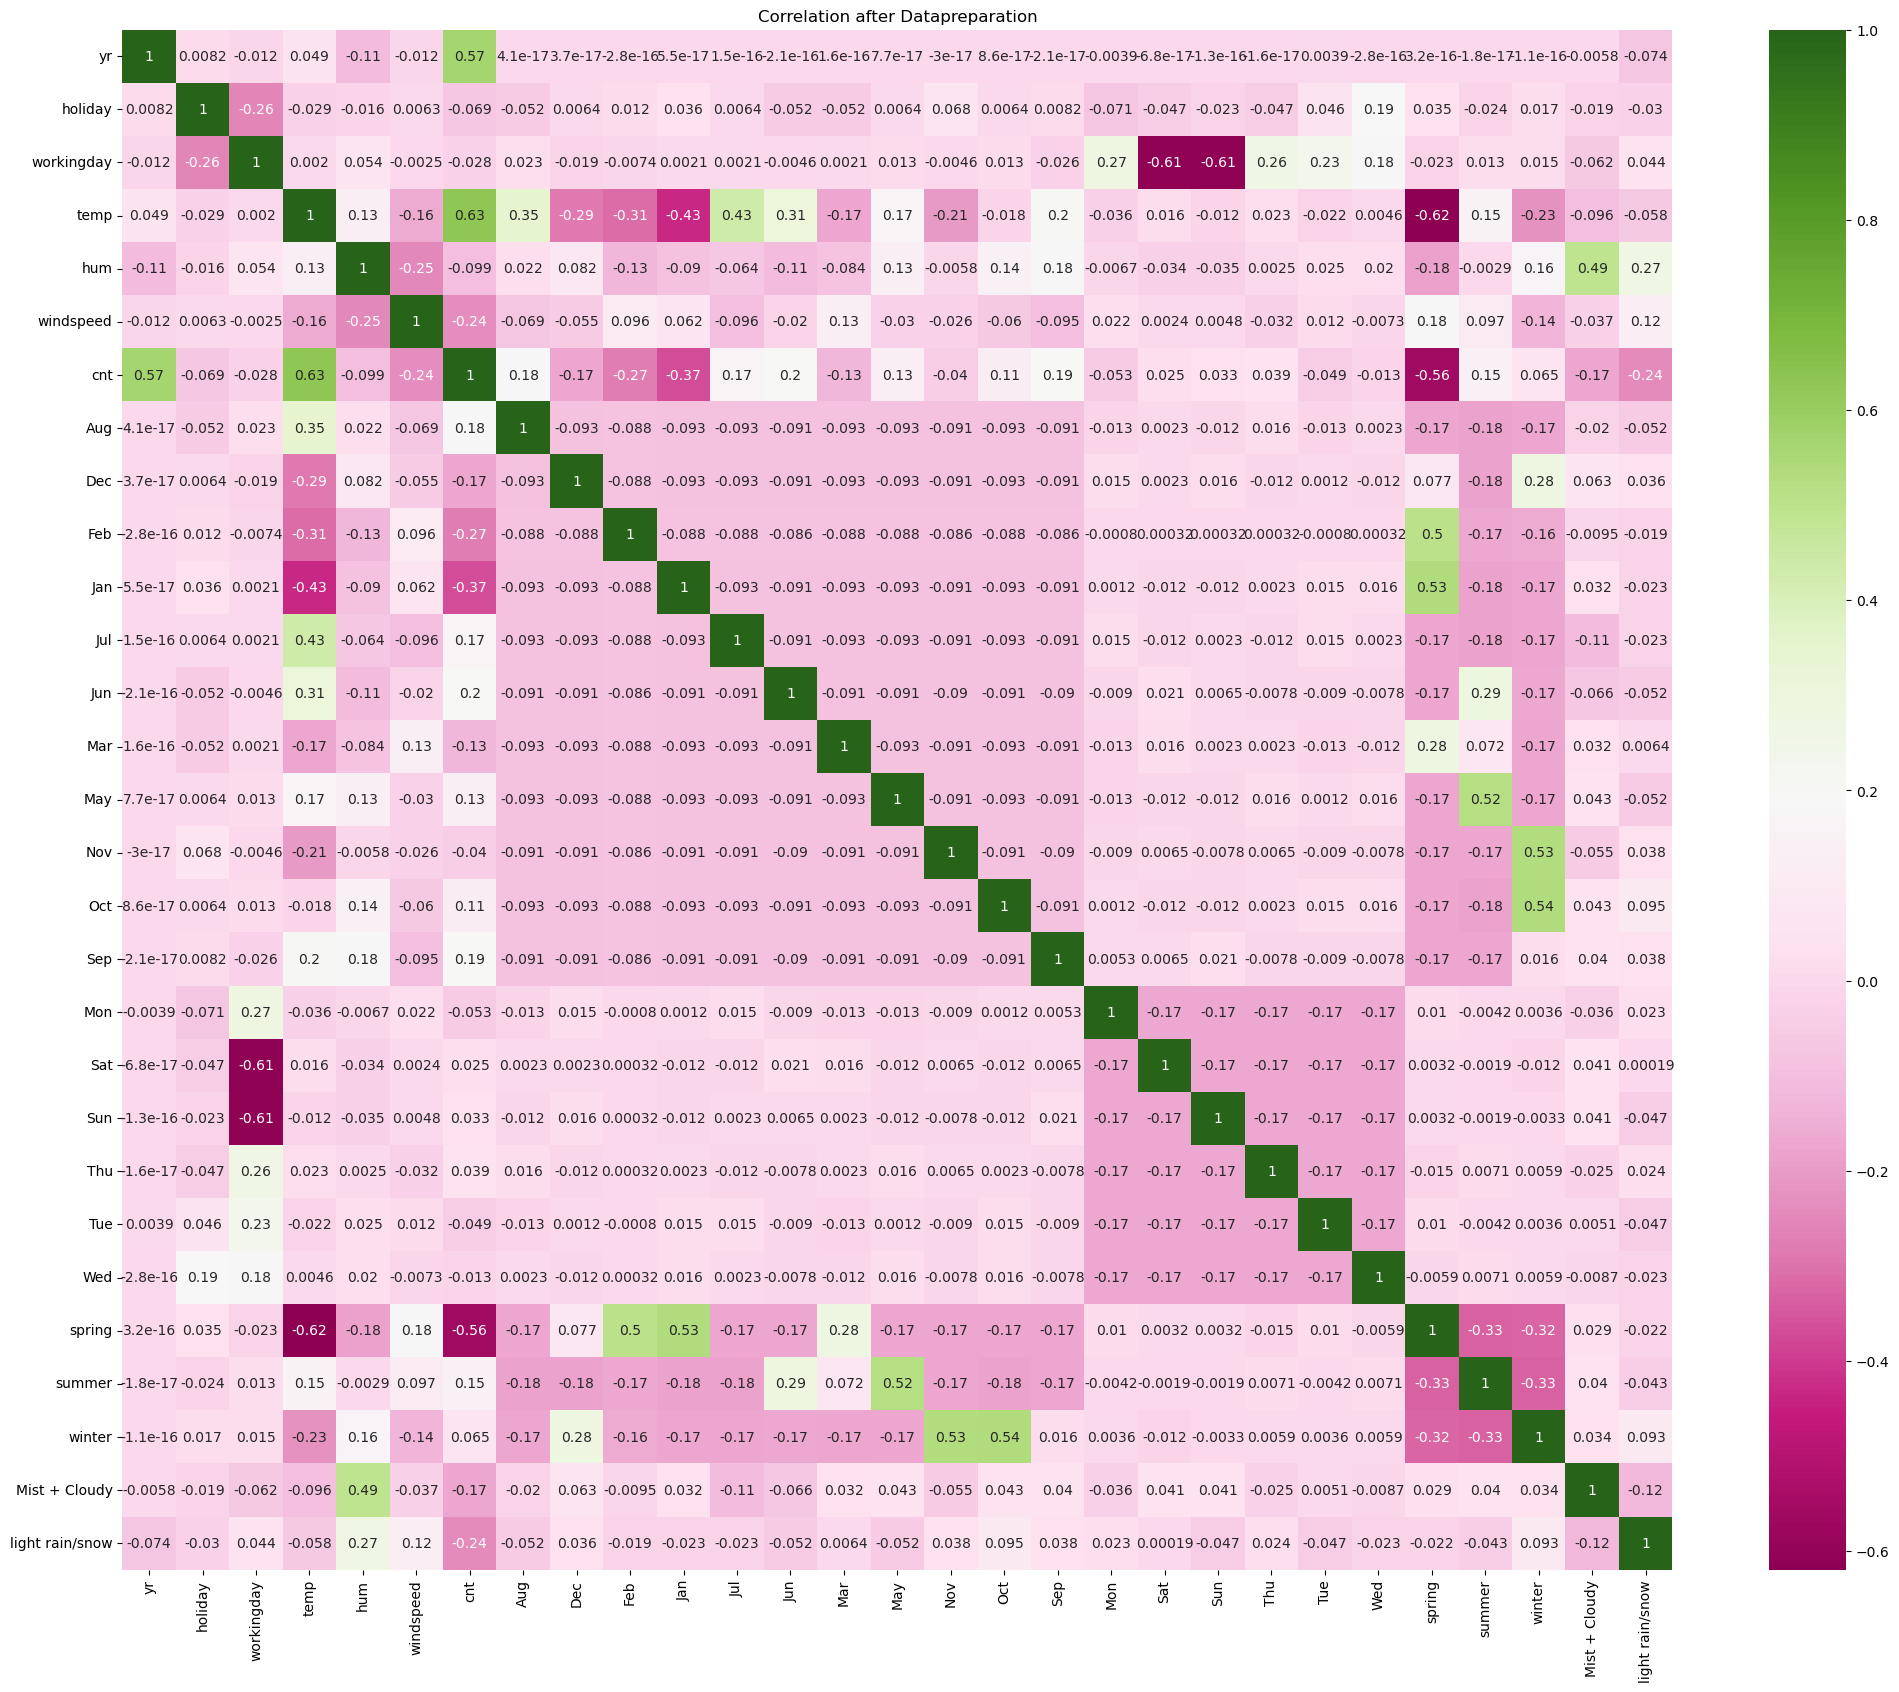

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="PiYG")
plt.title("Correlation after Datapreparation")
plt.show()

Analysis:As we can see bike data count variable has corelation with year,temp,spring

Insights:
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [44]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [45]:
bike_train.shape

(510, 29)

In [46]:
bike_test.shape

(220, 29)

In [47]:
bike_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765   20.108257   63.123710   12.834912   
std      0.500429    0.157763    0.453386    7.431626   14.153170    5.292031   
min      0.000000    0.000000    0.000000    2.424346    0.000000    2.834381   
25%      0.000000    0.000000    0.000000   13.606865   52.270825    9.041918   
50%      1.000000    0.000000    1.000000   20.277923   63.437500   12.083182   
75%      1.000000    0.000000    1.000000   26.615847   73.250025   15.750879   
max      1.000000    1.000000    1.000000   35.328347   97.041700   34.000021   

               cnt         Aug         Dec         Feb  ...         Sat  \
count   510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean   4485.337255    0.096078    0.084314    0.066667  ...    0.129412   
std    1950.666077    0.294988    0.278131    0.249689  ...    0.335985   
min      22.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3120.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4530.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5973.500000    0.000000    0.000000    0.000000  ...    0.000000   
max    8714.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed      spring      summer  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.137255    0.143137    0.152941    0.135294    0.243137    0.247059   
std      0.344454    0.350557    0.360284    0.342373    0.429398    0.431725   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           winter  Mist + Cloudy  light rain/snow  
count  510.000000     510.000000       510.000000  
mean     0.247059       0.345098         0.029412  
std      0.431725       0.475867         0.169124  
min      0.000000       0.000000         0.000000  
25%      0.000000       0.000000         0.000000  
50%      0.000000       0.000000         0.000000  
75%      0.000000       1.000000         0.000000  
max      1.000000       1.000000         1.000000  

[8 rows x 29 columns]

#Rescaling using min max scaling method

In [48]:
scaler = MinMaxScaler()


Normalizing(between 0 and 1) using fit transorm method

In [49]:
# Temp,hum,windspeed,cnt data has high values compared to other columns .so we need to rescale this to fit this in the same range for further analysis
# Apply scaler() to all the columns except the encoding dummy variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [50]:
bike_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.096078    0.084314    0.066667  ...    0.129412   
std      0.224421    0.294988    0.278131    0.249689  ...    0.335985   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed      spring      summer  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.137255    0.143137    0.152941    0.135294    0.243137    0.247059   
std      0.344454    0.350557    0.360284    0.342373    0.429398    0.431725   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           winter  Mist + Cloudy  light rain/snow  
count  510.000000     510.000000       510.000000  
mean     0.247059       0.345098         0.029412  
std      0.431725       0.475867         0.169124  
min      0.000000       0.000000         0.000000  
25%      0.000000       0.000000         0.000000  
50%      0.000000       0.000000         0.000000  
75%      0.000000       1.000000         0.000000  
max      1.000000       1.000000         1.000000  

[8 rows x 29 columns]

In [51]:
#Scaling test data

In [52]:
# check test dataset before scaling
bike_test.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  Aug  Dec  \
184   0        1           0  29.793347  63.7917   5.459106  6043    0    0   
535   1        0           1  32.082500  59.2083   7.625404  6211    0    0   
299   0        0           0  19.270000  81.2917  13.250121  2659    0    0   
221   0        0           1  31.433347  42.4167  13.417286  4780    1    0   
152   0        0           0  29.315000  30.5000  19.583229  4968    0    0   

     Feb  ...  Sat  Sun  Thu  Tue  Wed  spring  summer  winter  Mist + Cloudy  \
184    0  ...    0    0    0    0    1       0       0       0              1   
535    0  ...    0    0    1    0    0       0       1       0              0   
299    0  ...    1    0    0    0    0       0       0       1              1   
221    0  ...    0    0    0    0    0       0       0       0              0   
152    0  ...    1    0    0    0    0       0       1       0              0   

     light rain/snow  
184                0  
535                0  
299                0  
221                0  
152                0  

[5 rows x 29 columns]

In [53]:
# transform test dataset 
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Aug  \
184   0        1           0  0.831783  0.657364   0.084219  0.692706    0   
535   1        0           1  0.901354  0.610133   0.153728  0.712034    0   
299   0        0           0  0.511964  0.837699   0.334206  0.303382    0   
221   0        0           1  0.881625  0.437098   0.339570  0.547400    1   
152   0        0           0  0.817246  0.314298   0.537414  0.569029    0   

     Dec  Feb  ...  Sat  Sun  Thu  Tue  Wed  spring  summer  winter  \
184    0    0  ...    0    0    0    0    1       0       0       0   
535    0    0  ...    0    0    1    0    0       0       1       0   
299    0    0  ...    1    0    0    0    0       0       0       1   
221    0    0  ...    0    0    0    0    0       0       0       0   
152    0    0  ...    1    0    0    0    0       0       1       0   

     Mist + Cloudy  light rain/snow  
184              1                0  
535              0                0  
299              1                0  
221              0                0  
152              0                0  

[5 rows x 29 columns]

In [54]:
# Creating X and y data dataframe for train set
y_train = bike_train.pop('cnt')
X_train = bike_train
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
576   1        0           1  0.815169  0.725633   0.264686    0    0    0   
426   1        0           0  0.442393  0.640189   0.255342    0    0    0   
728   1        0           1  0.245101  0.498067   0.663106    0    1    0   
482   1        0           0  0.395666  0.504508   0.188475    0    0    0   
111   0        0           0  0.345824  0.751824   0.380981    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  spring  summer  winter  Mist + Cloudy  \
576    0  ...    0    0    0    0    1       0       0       0              0   
426    0  ...    0    1    0    0    0       1       0       0              1   
728    0  ...    0    0    0    0    0       1       0       0              0   
482    0  ...    0    1    0    0    0       0       1       0              1   
111    0  ...    0    1    0    0    0       0       1       0              1   

     light rain/snow  
576                0  
426                0  
728                0  
482                0  
111                0  

[5 rows x 28 columns]

In [55]:
# Creating X and y data dataframe for test set
y_test = bike_test.pop('cnt')
X_test = bike_test

X_test.head()

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
184   0        1           0  0.831783  0.657364   0.084219    0    0    0   
535   1        0           1  0.901354  0.610133   0.153728    0    0    0   
299   0        0           0  0.511964  0.837699   0.334206    0    0    0   
221   0        0           1  0.881625  0.437098   0.339570    1    0    0   
152   0        0           0  0.817246  0.314298   0.537414    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  spring  summer  winter  Mist + Cloudy  \
184    0  ...    0    0    0    0    1       0       0       0              1   
535    0  ...    0    0    1    0    0       0       1       0              0   
299    0  ...    1    0    0    0    0       0       0       1              1   
221    0  ...    0    0    0    0    0       0       0       0              0   
152    0  ...    1    0    0    0    0       0       1       0              0   

     light rain/snow  
184                0  
535                0  
299                0  
221                0  
152                0  

[5 rows x 28 columns]

we can see Max is 1 for all columns so rescaling is successfully done and all the stastical data is between 0 and 1

#Multicolinearty Let's check the correlation between independent variabels

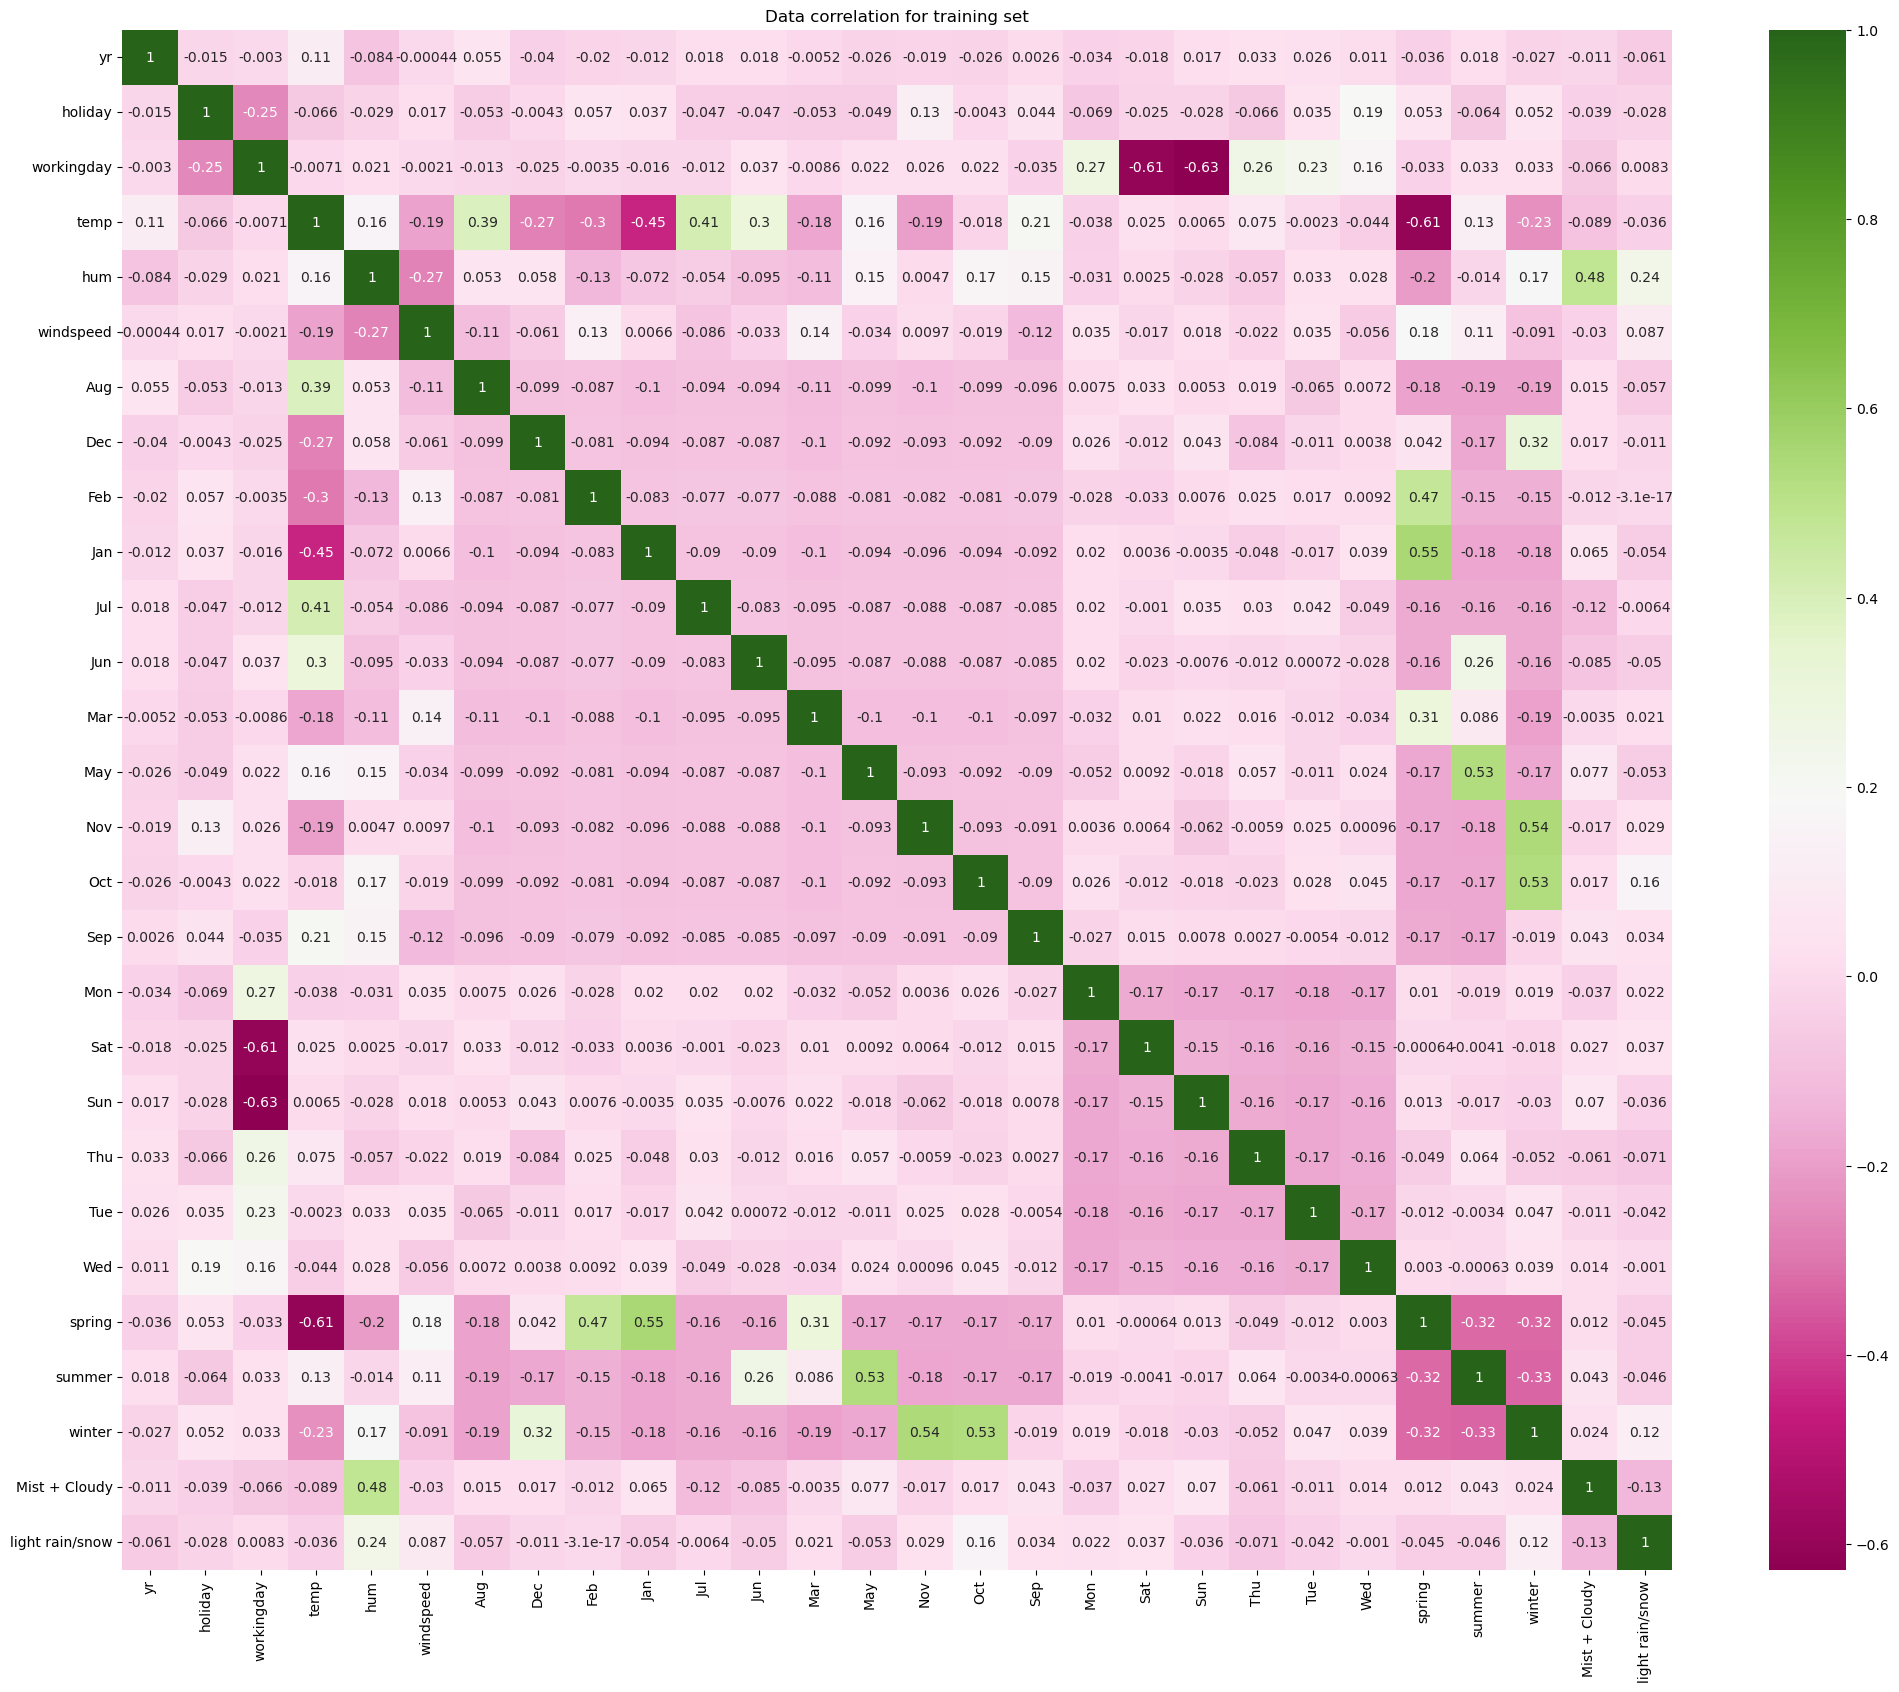

In [56]:
 

plt.figure(figsize = (25, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="PiYG")
plt.title("Data correlation for training set")
plt.show()

Analysis:

The count seems to be heavily correlated with 0.65 with temp variable. We will now observe the variance using pairplots

Step 5:Data Modelling

In [57]:
import statsmodels.api as sm

In [58]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'spring', 'summer', 'winter',
       'Mist + Cloudy', 'light rain/snow'],
      dtype='object')

In [59]:
X_train.shape

(510, 28)

In [60]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 576 to 520
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


### Checking colinearity manually

In [61]:
#add constant sm means statasic model
x_train_sm=X_train[['temp']]

x_train_sm=sm.add_constant(x_train_sm)
print(x_train_sm.head())

#constant os 0.16 and co-effiecent is positive 0.64

     const      temp
576    1.0  0.815169
426    1.0  0.442393
728    1.0  0.245101
482    1.0  0.395666
111    1.0  0.345824


In [62]:
#Build first forward linear regression model here F1 is forwardbuilding 1
lr_F1=sm.OLS(y_train,x_train_sm)

#fit the model
lr_model_F1=lr_F1.fit()

#params
lr_model_F1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.46e-61
Time:                        23:39:22   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Analysis:

#About41% of the variance in count in bike is explained by temp variable 

#significant relationshio p value is exactly 0,coefficient is 0.64 which is not bad lets add and proceed in building model
#for 1 value of slope the cnt increases by 0.64 on an average


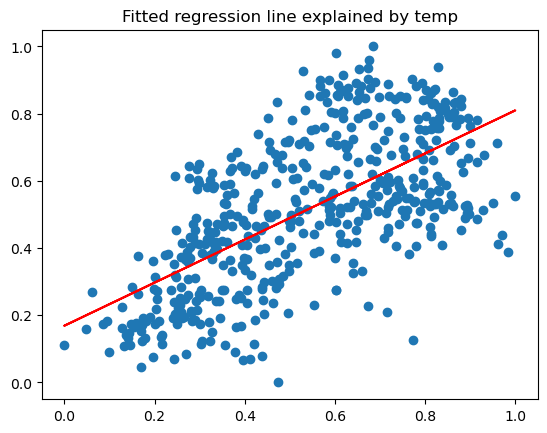

In [63]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(x_train_sm.iloc[:, 1], y_train)
plt.plot(x_train_sm.iloc[:, 1], 0.1690 + 0.6409*x_train_sm.iloc[:, 1], 'r')
plt.title("Fitted regression line explained by temp")
plt.show()

#The criteria for the best fit line is that the sum of the squared errors (SSE) is minimized.

Adding another variable thus building multiple regression model.As we can see yr has high corelation lets check if r2 value changes or not

In [64]:
#add constant sm means statasic model
x_train_sm_2=X_train[['yr','temp']]
x_train_sm_2=sm.add_constant(x_train_sm_2)
# print(x_train_sm_2.head())

#Build second forward build model
lr_F2=sm.OLS(y_train,x_train_sm_2)

#fit the model
lr_model_2=lr_F2.fit()

#summary
lr_model_2.summary()
#constant os 0.16 and co-effiecent of temp has reduced and coeffienct of yr is positive and p value of all the three are exactly 0.00
#this means all the coefficents are stastically significantly .
#R2 has increased to 0.69 .About 69% variance in count is explained by temp and yr variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.34e-130
Time:                        23:39:22   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
yr             0.2367      0.011     21.276      0.000       0.215       0.259
temp           0.5843      0.025     23.698      0.000       0.536       0.633
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#since p value increased lets opt for 10th model only

In [65]:
x_train_sm_2.drop('const',axis=1,inplace=True)

In [66]:
#Check VIF
vif = pd.DataFrame()
vif['Features'] = x_train_sm_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm_2.values, i) for i in range(x_train_sm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       yr  1.89
1     temp  1.89

### RFE Method

In [67]:
# ----------------------------------------------------------

 Analysis 69% of the variance in the count quantity is explained by temperature and year data




RFE(Recursive Feature Elimination)  
Used LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)





###First Model Adding all the variables from training set and checkeing the r sqaure

In [68]:
x_train_sm=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'spring', 'summer', 'winter',
       'Mist + Cloudy', 'light rain/snow']]
x_train_sm=sm.add_constant(x_train_sm)

#Build first model
lr=sm.OLS(y_train,x_train_sm)

#fit the model
lr_model_1=lr.fit()

#summary
lr_model_1.summary()
#constant os 0.16 and co-effiecent of temp has reduced and coeffienct of yr is positive and p value of all the three are exactly 0.00
#this means all the coefficents are stastically significantly .
#R2 has increased to 0.69 .About 69% variance in count is explained by temp and yr variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.34e-178
Time:                        23:39:23   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3912      0.085      4.594      0.000       0.224       0.558
yr                  0.2311      0.008     28.384      0.000       0.215       0.247
holiday            -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday         -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp                0.4405      0.047      9.412      0.000       0.349       0.532
hum                -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed          -0.1825      0.026     -7.003      0.000      -0.234      -0.131
Aug                 0.0273      0.034      0.806      0.421      -0.039       0.094
Dec                -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb                -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan                -0.0642      0.034     -1.894      0.059      -0.131       0.002
Jul                -0.0285      0.035     -0.808      0.420      -0.098       0.041
Jun                 0.0084      0.025      0.336      0.737      -0.041       0.058
Mar                 0.0008      0.025      0.032      0.974      -0.048       0.050
May                 0.0247      0.021      1.164      0.245      -0.017       0.066
Nov                -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct                 0.0056      0.036      0.156      0.876      -0.066       0.077
Sep                 0.0908      0.032      2.822      0.005       0.028       0.154
Mon                -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat                -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun                -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu                 0.0042      0.015      0.282      0.778      -0.025       0.034
Tue                -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed                -0.0102      0.015     -0.669      0.504      -0.040       0.020
spring             -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer              0.0464      0.026      1.761      0.079      -0.005       0.098
winter              0.1126      0.028      3.994      0.000       0.057       0.168
Mist + Cloudy      -0.0578      0.011     -5.495      0.000      -0.079      -0.037
light rain/snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4


In [69]:
x_train_sm.drop('const',axis=1,inplace=True)

In [70]:
# # Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:

vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2        workingday  63.89
3              temp  43.77
4               hum  41.18
23           spring  13.50
25           winter  12.40
19              Sun  12.34
18              Sat  11.83
24           summer   9.85
14              Nov   7.16
15              Oct   6.82
6               Aug   6.79
9               Jan   6.09
10              Jul   5.91
7               Dec   5.78
5         windspeed   5.59
16              Sep   5.02
8               Feb   4.50
12              Mar   3.72
11              Jun   3.04
1           holiday   2.81
13              May   2.43
26    Mist + Cloudy   2.43
0                yr   2.14
21              Tue   2.09
17              Mon   2.09
20              Thu   2.04
22              Wed   1.97
27  light rain/snow   1.33

In [72]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Second Model built with the help of RFE 

In [73]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)

In [74]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

rank  support         features
0      1     True               yr
25     1     True           winter
24     1     True           summer
23     1     True           spring
16     1     True              Sep
14     1     True              Nov
26     1     True    Mist + Cloudy
10     1     True              Jul
9      1     True              Jan
27     1     True  light rain/snow
7      1     True              Dec
1      1     True          holiday
3      1     True             temp
5      1     True        windspeed
4      1     True              hum
8      2    False              Feb
2      3    False       workingday
18     4    False              Sat
19     5    False              Sun
21     6    False              Tue
17     7    False              Mon
13     8    False              May
6      9    False              Aug
22    10    False              Wed
11    11    False              Jun
15    12    False              Oct
20    13    False              Thu
12    14    False              Mar

In [75]:
#Columns where RFE support is True
col_RFE_True = X_train.columns[rfe.support_]
col_RFE_True

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'spring', 'summer', 'winter', 'Mist + Cloudy',
       'light rain/snow'],
      dtype='object')

In [76]:
#Columns where RFE not supported
col_RFE_False = X_train.columns[~rfe.support_]
col_RFE_False

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

Building second model with 15var

In [77]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = X_train[col_RFE_True]

In [78]:
import statsmodels.api as sm 

In [79]:
#Building RFE second model
x_train_rfe_2=sm.add_constant(x_train_rfe)
x_train_rfe_2.head()

const  yr  holiday      temp       hum  windspeed  Dec  Jan  Jul  Nov  \
576    1.0   1        0  0.815169  0.725633   0.264686    0    0    1    0   
426    1.0   1        0  0.442393  0.640189   0.255342    0    0    0    0   
728    1.0   1        0  0.245101  0.498067   0.663106    1    0    0    0   
482    1.0   1        0  0.395666  0.504508   0.188475    0    0    0    0   
111    1.0   0        0  0.345824  0.751824   0.380981    0    0    0    0   

     Sep  spring  summer  winter  Mist + Cloudy  light rain/snow  
576    0       0       0       0              0                0  
426    0       1       0       0              1                0  
728    0       1       0       0              0                0  
482    0       0       1       0              1                0  
111    0       0       1       0              1                0

In [80]:
#fitting the model

lr_model_2=sm.OLS(y_train, x_train_rfe_2).fit()

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          8.15e-189
Time:                        23:39:24   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036      8.859      0.000       0.249       0.391
yr                  0.2304      0.008     28.487      0.000       0.215       0.246
holiday            -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                0.4815      0.037     13.005      0.000       0.409       0.554
hum                -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed          -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec                -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                 0.0755      0.017      4.466      0.000       0.042       0.109
spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer              0.0423      0.015      2.761      0.006       0.012       0.072
winter              0.1019      0.018      5.656      0.000       0.067       0.137
Mist + Cloudy      -0.0543      0.010     -5.194      0.000      -0.075      -0.034
light rain/snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking VIF

In [81]:
x_train_rfe_2.drop('const',axis=1,inplace=True)


In [82]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_2.values, i) for i in range(x_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3               hum  30.89
2              temp  17.79
4         windspeed   4.72
10           spring   4.37
12           winter   4.06
11           summer   2.82
13    Mist + Cloudy   2.32
0                yr   2.09
8               Nov   1.85
6               Jan   1.75
7               Jul   1.59
5               Dec   1.56
9               Sep   1.41
14  light rain/snow   1.28
1           holiday   1.06

Lets drop Jan due to high p value and vif value 

##Building 3 model

In [83]:
#Drop humidity since 
x_train_3 = x_train_rfe_2.drop(["hum"], axis = 1)

In [84]:
#Build a model
x_train_3 = sm.add_constant(x_train_3)
lr_model_3 = sm.OLS(y_train,x_train_3).fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.75e-186
Time:                        23:39:25   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [85]:
x_train_3.drop('const',axis=1,inplace=True)

In [86]:
vif = pd.DataFrame()
vif['Features'] = x_train_3.columns
vif['VIF'] = [variance_inflation_factor(x_train_3.values, i) for i in range(x_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              temp  5.17
3         windspeed  4.67
11           winter  2.95
9            spring  2.89
10           summer  2.24
0                yr  2.07
7               Nov  1.81
5               Jan  1.66
6               Jul  1.59
12    Mist + Cloudy  1.57
4               Dec  1.47
8               Sep  1.35
13  light rain/snow  1.09
1           holiday  1.06

Variable eliminatio technique used:
similary we can other variable and build model and the process continuous based on the below condition
High p-value, high VIF : definitely drop

High-Low:

High p, low VIF : remove these first, then build model again and check VIF again
Low p, high VIF : remove these later
Low p-value, low VIF : keep variable

Building fourth model

In [87]:
# R2 is 0.839 with 14 variable and with 0.830 with 9 variable

In [88]:
#Drop Nov since high p and vif value 
x_train_4 = x_train_3.drop(["Nov"], axis = 1)

In [89]:
#Build a model
x_train_4 = sm.add_constant(x_train_4)
lr_model_4 = sm.OLS(y_train,x_train_4).fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.74e-186
Time:                        23:39:26   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [90]:
x_train_4.drop('const',axis=1,inplace=True)

In [91]:
vif = pd.DataFrame()
vif['Features'] = x_train_4.columns
vif['VIF'] = [variance_inflation_factor(x_train_4.values, i) for i in range(x_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              temp  5.14
3         windspeed  4.62
8            spring  2.89
9            summer  2.24
0                yr  2.07
10           winter  2.05
5               Jan  1.65
6               Jul  1.59
11    Mist + Cloudy  1.57
7               Sep  1.34
4               Dec  1.29
12  light rain/snow  1.08
1           holiday  1.04

In [92]:
#Drop Nov since high p and vif value 
x_train_5 = x_train_4.drop(["Jan"], axis = 1)
#Build a model
x_train_5 = sm.add_constant(x_train_5)
lr_model_5 = sm.OLS(y_train,x_train_5).fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.75e-186
Time:                        23:39:26   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     497   BIC:                            -918.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2064      0.030     

In [93]:
x_train_5.drop('const',axis=1,inplace=True)

In [94]:
vif = pd.DataFrame()
vif['Features'] = x_train_5.columns
vif['VIF'] = [variance_inflation_factor(x_train_5.values, i) for i in range(x_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              temp  5.10
3         windspeed  4.60
8            summer  2.23
7            spring  2.13
0                yr  2.07
9            winter  2.03
5               Jul  1.58
10    Mist + Cloudy  1.55
6               Sep  1.34
4               Dec  1.26
11  light rain/snow  1.08
1           holiday  1.04

In [95]:
#Drop Nov since high p and vif value 
x_train_6 = x_train_5.drop(["Dec"], axis = 1)
#Build a model
x_train_6 = sm.add_constant(x_train_6)
lr_model_6 = sm.OLS(y_train,x_train_6).fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.06e-187
Time:                        23:39:27   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [96]:
x_train_6.drop('const',axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = x_train_6.columns
vif['VIF'] = [variance_inflation_factor(x_train_6.values, i) for i in range(x_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              temp  5.09
3         windspeed  4.60
7            summer  2.23
6            spring  2.08
0                yr  2.07
8            winter  1.78
4               Jul  1.58
9     Mist + Cloudy  1.55
5               Sep  1.34
10  light rain/snow  1.08
1           holiday  1.04

In [97]:
#Drop Nov since high p and vif value 
x_train_7 = x_train_6.drop(["summer"], axis = 1)
#Build a model
x_train_7 = sm.add_constant(x_train_7)
lr_model_7 = sm.OLS(y_train,x_train_7).fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.10e-186
Time:                        23:39:27   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2531      0.024     

In [98]:
x_train_7.drop('const',axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = x_train_7.columns
vif['VIF'] = [variance_inflation_factor(x_train_7.values, i) for i in range(x_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2             temp  4.61
3        windspeed  4.00
0               yr  2.06
6           spring  1.64
8    Mist + Cloudy  1.52
7           winter  1.39
4              Jul  1.35
5              Sep  1.20
9  light rain/snow  1.08
1          holiday  1.04

In [99]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lr_model_7

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'Jul', 'Sep', 'spring', 'winter', 'Mist + Cloudy', 'light rain/snow']

Coefficent for the variables are:
const              0.253
yr                 0.234
holiday           -0.098
temp               0.450
windspeed         -0.140
Jul               -0.073
Sep                0.057
spring            -0.112
winter             0.045
Mist + Cloudy     -0.080
light rain/snow   -0.285
dtype: float64


In [100]:
# Residual analysis
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [101]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

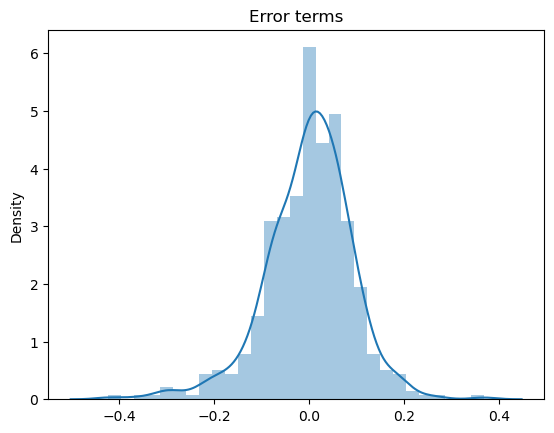

In [102]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[var_final])

y_train_pred = lm_final.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)




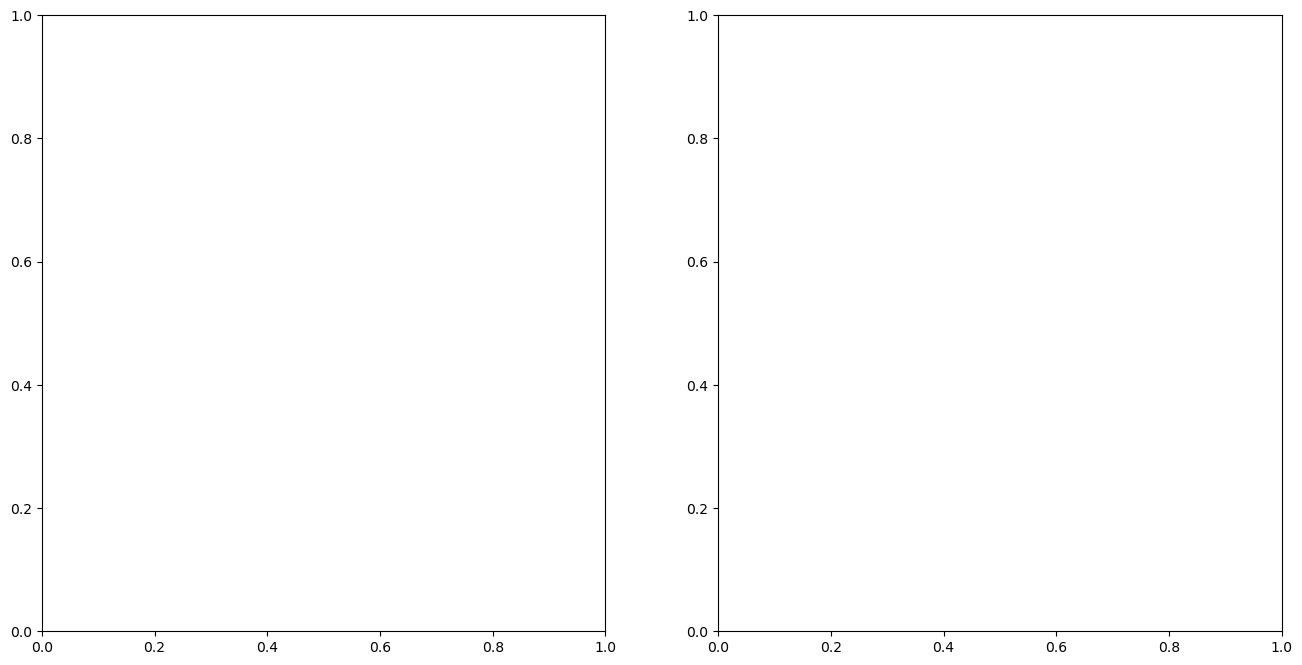

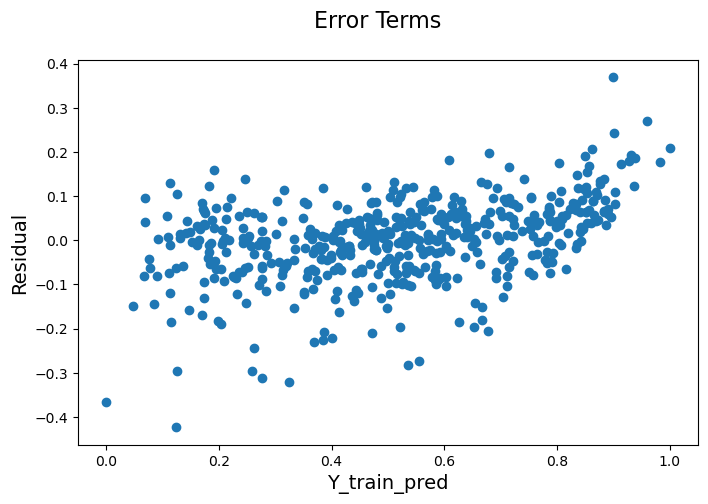

In [103]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   
plt.show()

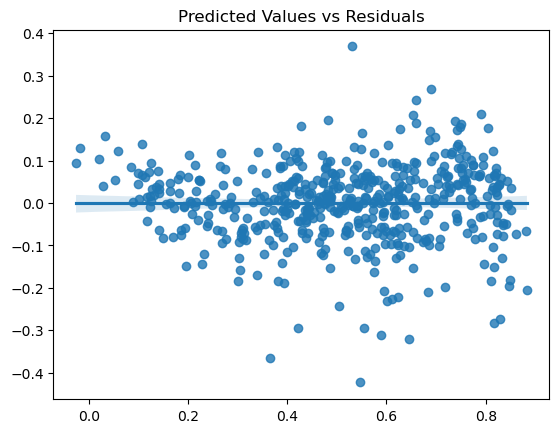

In [104]:
plt.title('Predicted Values vs Residuals')
sns.regplot(y_train_pred,y_train-y_train_pred)
plt.show()

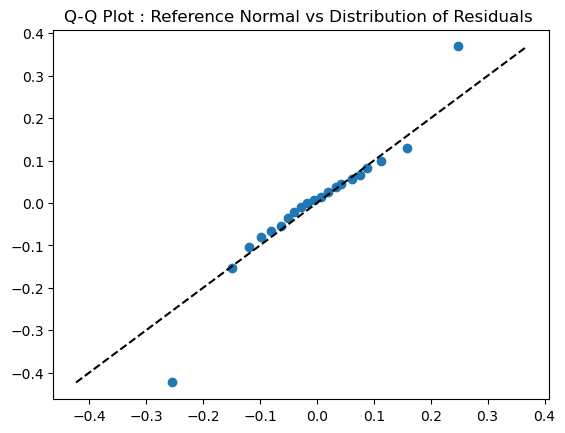

In [105]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

In [106]:
# Prediction on test

In [107]:
bike_test.head()

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
184   0        1           0  0.831783  0.657364   0.084219    0    0    0   
535   1        0           1  0.901354  0.610133   0.153728    0    0    0   
299   0        0           0  0.511964  0.837699   0.334206    0    0    0   
221   0        0           1  0.881625  0.437098   0.339570    1    0    0   
152   0        0           0  0.817246  0.314298   0.537414    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  spring  summer  winter  Mist + Cloudy  \
184    0  ...    0    0    0    0    1       0       0       0              1   
535    0  ...    0    0    1    0    0       0       1       0              0   
299    0  ...    1    0    0    0    0       0       0       1              1   
221    0  ...    0    0    0    0    0       0       0       0              0   
152    0  ...    1    0    0    0    0       0       1       0              0   

     light rain/snow  
184                0  
535                0  
299                0  
221                0  
152                0  

[5 rows x 28 columns]

In [108]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

yr  holiday      temp  windspeed  Jul  Sep  spring  winter  \
184   0        1  0.831783   0.084219    1    0       0       0   
535   1        0  0.901354   0.153728    0    0       0       0   
299   0        0  0.511964   0.334206    0    0       0       1   
221   0        0  0.881625   0.339570    0    0       0       0   
152   0        0  0.817246   0.537414    0    0       0       0   

     Mist + Cloudy  light rain/snow  
184              1                0  
535              0                0  
299              1                0  
221              0                0  
152              0                0

In [109]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

const  yr  holiday      temp  windspeed  Jul  Sep  spring  winter  \
184    1.0   0        1  0.831783   0.084219    1    0       0       0   
535    1.0   1        0  0.901354   0.153728    0    0       0       0   
299    1.0   0        0  0.511964   0.334206    0    0       0       1   
221    1.0   0        0  0.881625   0.339570    0    0       0       0   
152    1.0   0        0  0.817246   0.537414    0    0       0       0   

     Mist + Cloudy  light rain/snow  
184              1                0  
535              0                0  
299              1                0  
221              0                0  
152              0                0

In [110]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [111]:
# Evaluate on testmodel
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))


R-Squared for Test dataset:  0.807


In [112]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.798


In [113]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0092


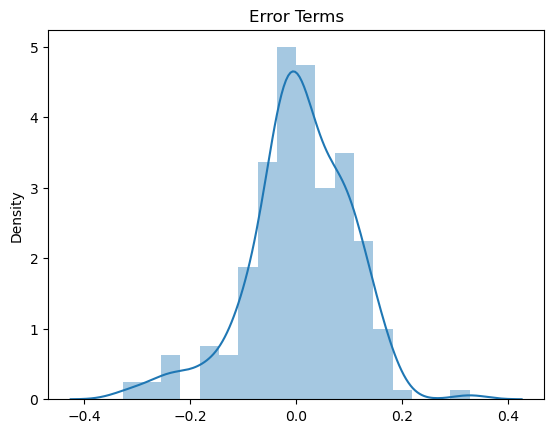

In [114]:
res_test = y_test - y_test_pred
plt.title('Error Terms') 

sns.distplot(res_test)
plt.show()

In [115]:
# The distribution plot of error term shows the normal distribution with mean at Zero.

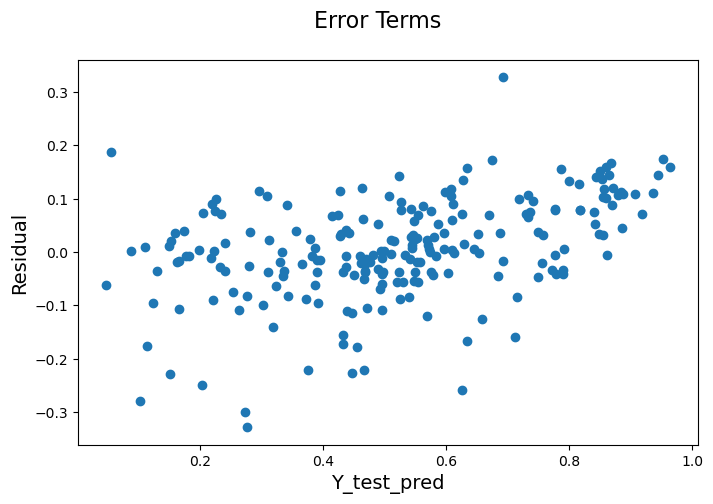

In [116]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)
plt.show()

In [117]:
# It seems like the corresponding residual plot is reasonably random.

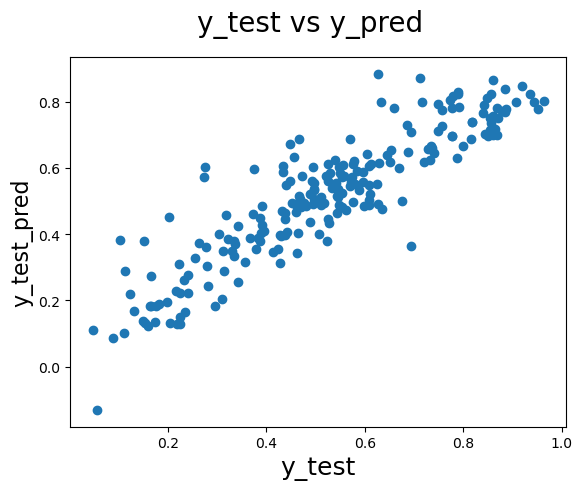

In [118]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)   
plt.show()

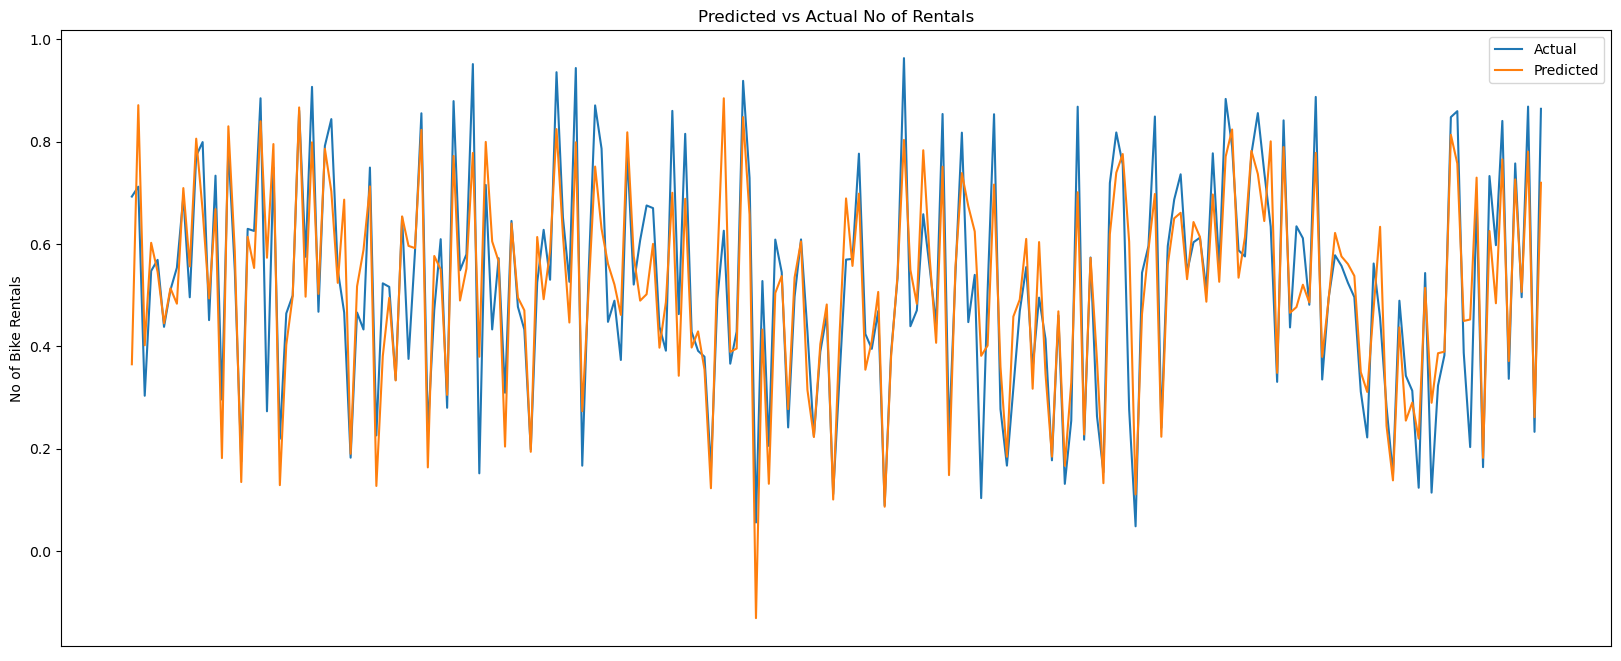

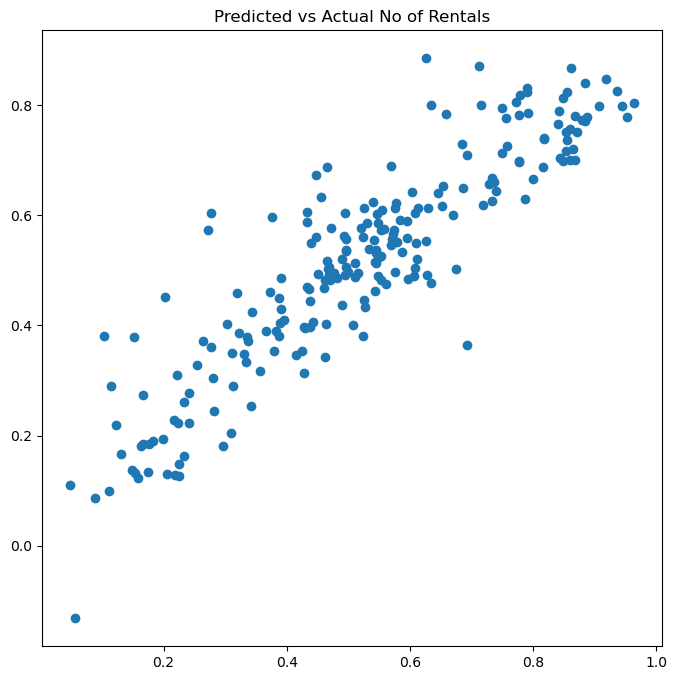

In [119]:
#Model analysis Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');
plt.show()

In [120]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.83   Adj. R-Squared train: 0.829
R- Sqaured test :  0.81   Adj. R-Squared test : 0.798

Coefficent for the variables are:
const              0.253
yr                 0.234
holiday           -0.098
temp               0.450
windspeed         -0.140
Jul               -0.073
Sep                0.057
spring            -0.112
winter             0.045
Mist + Cloudy     -0.080
light rain/snow   -0.285
dtype: float64


In [121]:
# The equation of our best fitted line is:

# cnt=0.253+(0.253×yr)-(0.098×holiday)+(0.450×temp)−(0.140×windspeed)-(0.073×Jul)+(0.057×sep)-(0.112×spring)+(0.045×winter)−(0.080×Mist + Cloudy)-(0.285*lightrain/snow)

In [122]:
# So it recomended to give these variables utmost importance while planning to achieve maximum demand.

In [123]:
# nalysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 10 most significant features to understand demand have been reported.

# The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 81% on test data.
# The final relationship between demand and predictors is as follows.

# # The equation of our best fitted line is:

# # cnt=0.253+(0.253×yr)-(0.098×holiday)+(0.450×temp)−(0.140×windspeed)-(0.073×Jul)+(0.057×sep)-(0.112×spring)+(0.045×winter)−(0.080×Mist + Cloudy)-(0.285*lightrain/snow)

# Note :


# The model has been verified for Multicollinearity effects.
# Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
# Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
# Further Lag plot shows there is no auto-correlation in data.
# Model is stable at 80%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
# Features in the order of influence has been reported by standardizing all predictor values.
 